# About Walmart

* Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.


# Business Problem

* The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).



# Dataset

* The company collected the transactional data of customers who purchased products from the Walmart Stores during Black Friday.

The dataset has the following features:
Dataset link: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094


User_ID:	User ID
Product_ID:	Product ID
Gender:	Sex of User
Age:	Age in bins
Occupation:	Occupation(Masked)
City_Category:	Category of the City (A,B,C)
StayInCurrentCityYears:	Number of years stay in current city
Marital_Status:	Marital Status
ProductCategory:	Product Category (Masked)
Purchase:	Purchase Amount

# Exploratory Data Analysis

In [1]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import t
import warnings
warnings.filterwarnings('ignore')
import copy

In [2]:
# loading the dataset
df = pd.read_csv('walmart_data.txt')

In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [4]:
df.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,490


In [5]:
df.shape

(550068, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


#### Insights

* From the above analysis, it is clear that, data has total of 10 features with lots of mixed alpha numeric data.

* Apart from Purchase Column, all the other data types are of categorical type. We will change the datatypes of all such columns to category

In [7]:
for i in df.columns[:-1]:
    df[i] = df[i].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  category
 1   Product_ID                  550068 non-null  category
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  category
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  category
 7   Marital_Status              550068 non-null  category
 8   Product_Category            550068 non-null  category
 9   Purchase                    550068 non-null  int64   
dtypes: category(9), int64(1)
memory usage: 10.3 MB


# Statistical Summary
* Satistical summary of object type columns

In [8]:
df.describe(include = 'category')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category
count,550068,550068,550068,550068,550068,550068,550068,550068,550068
unique,5891,3631,2,7,21,3,5,2,20
top,1001680,P00265242,M,26-35,4,B,1,0,5
freq,1026,1880,414259,219587,72308,231173,193821,324731,150933


### Insights

1. User_ID - Among 5,50,068 transactions there are 5891 unique user_id, indicating same customers buying multiple products.

2. Product_ID - Among 5,50,068 transactions there are 3631 unique products,with the product having the code P00265242 being the highest seller, with a maximum of 1,880 units sold.

3. Gender - Out of 5,50,068 transactions, 4,14,259 (nearly 75%) were done by male gender indicating a significant disparity in purchase behavior between males and females during the Black Friday event.

4. Age - We have 7 unique age groups in the dataset. 26 - 35 Age group has maximum of 2,19,587 transactions. We will analyse this feature in detail in future

5. Stay_In_Current_City_Years - Customers with 1 year of stay in current city accounted to maximum of 1,93,821 transactions among all the other customers with (0,2,3,4+) years of stay in current city

6. Marital_Status - 59% of the total transactions were done by Unmarried Customers and 41% by Married Customers.

##### Satistical summary of numerical data type columns

In [9]:
df.describe()

,Purchase
count,550068.000000
mean,9263.968713
std,5023.065394
min,12.000000
25%,5823.000000
50%,8047.000000
75%,12054.000000
max,23961.000000


##### Insights

* The purchase amounts vary widely, with the minimum recorded purchase being 12 and the maximum reaching 23961. The median purchase amount of 8047 is notably lower than the mean purchase amount of 9264, indicating a right-skewed distribution where a few high-value purchases pull up the mean
##### Duplicate Detection

In [10]:
df.duplicated().value_counts()

False    550068
Name: count, dtype: int64

# Sanity Check for columns

In [11]:
# checking the unique values for columns
for i in df.columns:
    print('Unique Values in',i,'column are :-')
    print(df[i].unique())
    print('-'*70)

Unique Values in User_ID column are :-
[1000001, 1000002, 1000003, 1000004, 1000005, ..., 1004588, 1004871, 1004113, 1005391, 1001529]
Length: 5891
Categories (5891, int64): [1000001, 1000002, 1000003, 1000004, ..., 1006037, 1006038, 1006039, 1006040]
----------------------------------------------------------------------
Unique Values in Product_ID column are :-
['P00069042', 'P00248942', 'P00087842', 'P00085442', 'P00285442', ..., 'P00375436', 'P00372445', 'P00370293', 'P00371644', 'P00370853']
Length: 3631
Categories (3631, object): ['P00000142', 'P00000242', 'P00000342', 'P00000442', ..., 'P0099642', 'P0099742', 'P0099842', 'P0099942']
----------------------------------------------------------------------
Unique Values in Gender column are :-
['F', 'M']
Categories (2, object): ['F', 'M']
----------------------------------------------------------------------
Unique Values in Age column are :-
['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25']
Categories (7, object): ['0-17'

##### Insights
* The dataset does not contain any abnormal values.

* We will convert the 0,1 in Marital Status column as married and unmarried

In [12]:
#replacing the values in marital_status column

df['Marital_Status'] = df['Marital_Status'].replace({0:'Unmarried',1:'Married'})
df['Marital_Status'].unique()

['Unmarried', 'Married']
Categories (2, object): ['Unmarried', 'Married']

# Missing Value Analysis

In [13]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

# Insights

* The dataset does not contain any missing values.

###### Univariate Analysis
###### Numerical Variables
### Purchase Amount Distribution

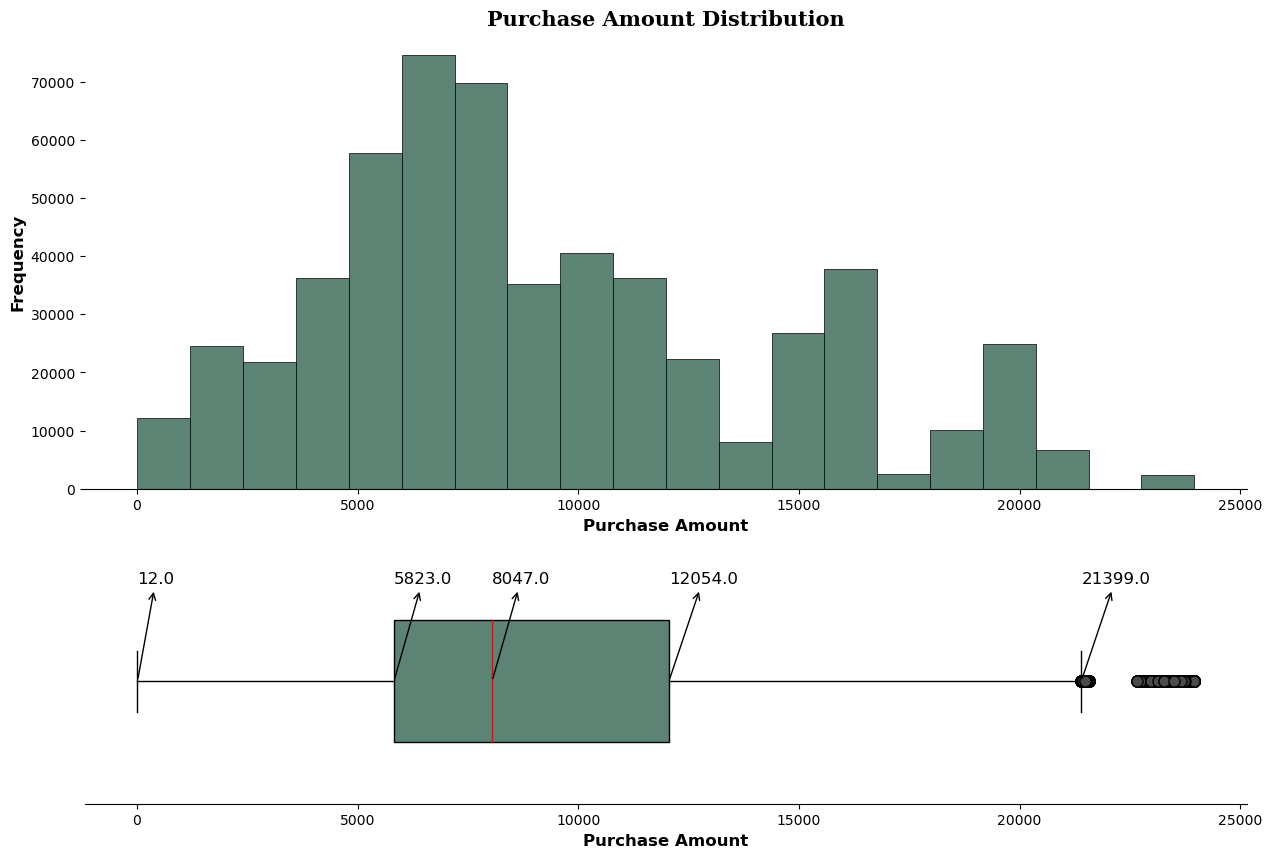

In [14]:
#setting the plot style

fig = plt.figure(figsize = (15,10))
gs = fig.add_gridspec(2,1,height_ratios=[0.65, 0.35])

                                    #creating purchase amount histogram
    
ax0 = fig.add_subplot(gs[0,0])

ax0.hist(df['Purchase'],color= '#5C8374',linewidth=0.5,edgecolor='black',bins = 20)
ax0.set_xlabel('Purchase Amount',fontsize = 12,fontweight = 'bold')
ax0.set_ylabel('Frequency',fontsize = 12,fontweight = 'bold')

#removing the axis lines
for s in ['top','left','right']:
    ax0.spines[s].set_visible(False)
    
#setting title for visual
ax0.set_title('Purchase Amount Distribution',{'font':'serif', 'size':15,'weight':'bold'})    
    

                                     #creating box plot for purchase amount
            
ax1 = fig.add_subplot(gs[1,0])
boxplot = ax1.boxplot(x = df['Purchase'],vert = False,patch_artist = True,widths = 0.5)

# Customize box and whisker colors
boxplot['boxes'][0].set(facecolor='#5C8374')

# Customize median line
boxplot['medians'][0].set(color='red')

# Customize outlier markers
for flier in boxplot['fliers']:
    flier.set(marker='o', markersize=8, markerfacecolor= "#4b4b4c")
    
#removing the axis lines
for s in ['top','left','right']:
    ax1.spines[s].set_visible(False)

#adding 5 point summary annotations
info = [i.get_xdata() for i in boxplot['whiskers']] #getting the upperlimit,Q1,Q3 and lowerlimit

median = df['Purchase'].quantile(0.5) #getting Q2

for i,j in info: #using i,j here because of the output type of info list comprehension
    
    ax1.annotate(text = f"{i:.1f}", xy = (i,1), xytext = (i,1.4),fontsize = 12,
                 arrowprops= dict(arrowstyle="<-", lw=1, connectionstyle="arc,rad=0"))
    
    ax1.annotate(text = f"{j:.1f}", xy = (j,1), xytext = (j,1.4),fontsize = 12,
                 arrowprops= dict(arrowstyle="<-", lw=1, connectionstyle="arc,rad=0"))    

#adding the median separately because it was included in info list
ax1.annotate(text = f"{median:.1f}",xy = (median,1),xytext = (median + 1,1.4),fontsize = 12,
            arrowprops= dict(arrowstyle="<-", lw=1, connectionstyle="arc,rad=0"))

#removing y-axis ticks
ax1.set_yticks([])

#adding axis label
ax1.set_xlabel('Purchase Amount',fontweight = 'bold',fontsize = 12)

plt.show()

* Calculating the Number of Outliers
* As seen above, Purchase amount over 21399 is considered as outlier. We will count the number of outliers as below

In [16]:
len(df.loc[df['Purchase'] > 21399,'Purchase'])

2677

##### Insights
##### Outliers

* There are total of 2677 outliers which is roughly 0.48% of the total data present in purchase amount. We will not remove them as it indicates a broad range of spending behaviors during the sale, highlighting the importance of tailoring marketing strategies to both regular and high-value customers to maximize revenue.

##### Distribution

* Data suggests that the majority of customers spent between 5,823 USD and 12,054 USD, with the median purchase amount being 8,047 USD.

The lower limit of 12 USD while the upper limit of 21,399 USD reveal significant variability in customer spending

#### Categorical Variables
* Gender
* Marital Status.
* City Category Distribution

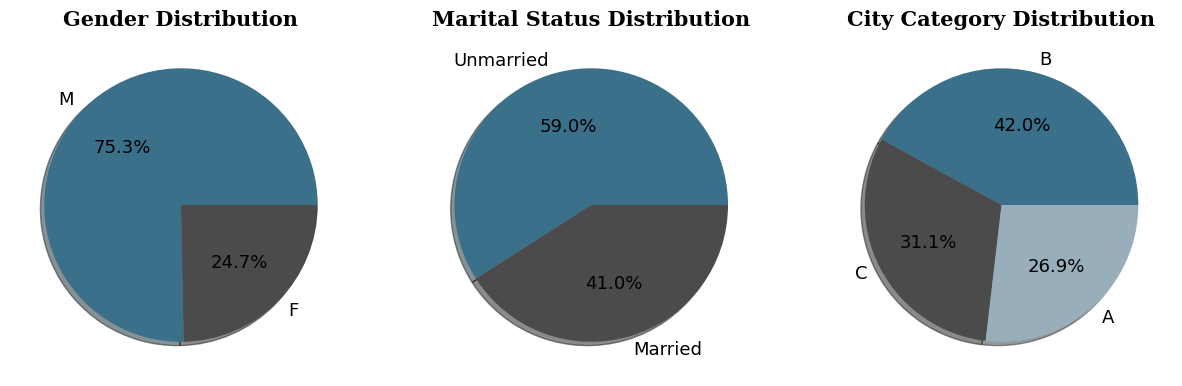

In [18]:
#setting the plot style
fig = plt.figure(figsize = (15,12))
gs = fig.add_gridspec(1,3)

                                        # creating pie chart for gender disribution
ax0 = fig.add_subplot(gs[0,0])

color_map = ["#3A7089", "#4b4b4c"]
ax0.pie(df['Gender'].value_counts().values,labels = df['Gender'].value_counts().index,autopct = '%.1f%%',
        shadow = True,colors = color_map,textprops={'fontsize': 13, 'color': 'black'})

#setting title for visual
ax0.set_title('Gender Distribution',{'font':'serif', 'size':15,'weight':'bold'})

                                        # creating pie chart for marital status
ax1 = fig.add_subplot(gs[0,1])

color_map = ["#3A7089", "#4b4b4c"]
ax1.pie(df['Marital_Status'].value_counts().values,labels = df['Marital_Status'].value_counts().index,autopct = '%.1f%%',
        shadow = True,colors = color_map,textprops={'fontsize': 13, 'color': 'black'})

#setting title for visual
ax1.set_title('Marital Status Distribution',{'font':'serif', 'size':15,'weight':'bold'})

                                        # creating pie chart for city category
ax1 = fig.add_subplot(gs[0,2])

color_map = ["#3A7089", "#4b4b4c",'#99AEBB']
ax1.pie(df['City_Category'].value_counts().values,labels = df['City_Category'].value_counts().index,autopct = '%.1f%%',
        shadow = True,colors = color_map,textprops={'fontsize': 13, 'color': 'black'})

#setting title for visual
ax1.set_title('City Category Distribution',{'font':'serif', 'size':15,'weight':'bold'})
plt.show()

#### Insights

* Gender Distribution - Data indicates a significant disparity in purchase behavior between males and females during the Black Friday event.

* Marital Status - Given that unmarried customers account for a higher percentage of transactions, it may be worthwhile to consider specific marketing campaigns or promotions that appeal to this group.

* City Category - City B saw the most number of transactions followed by City C and City A respectively

### Customer Age Distribution

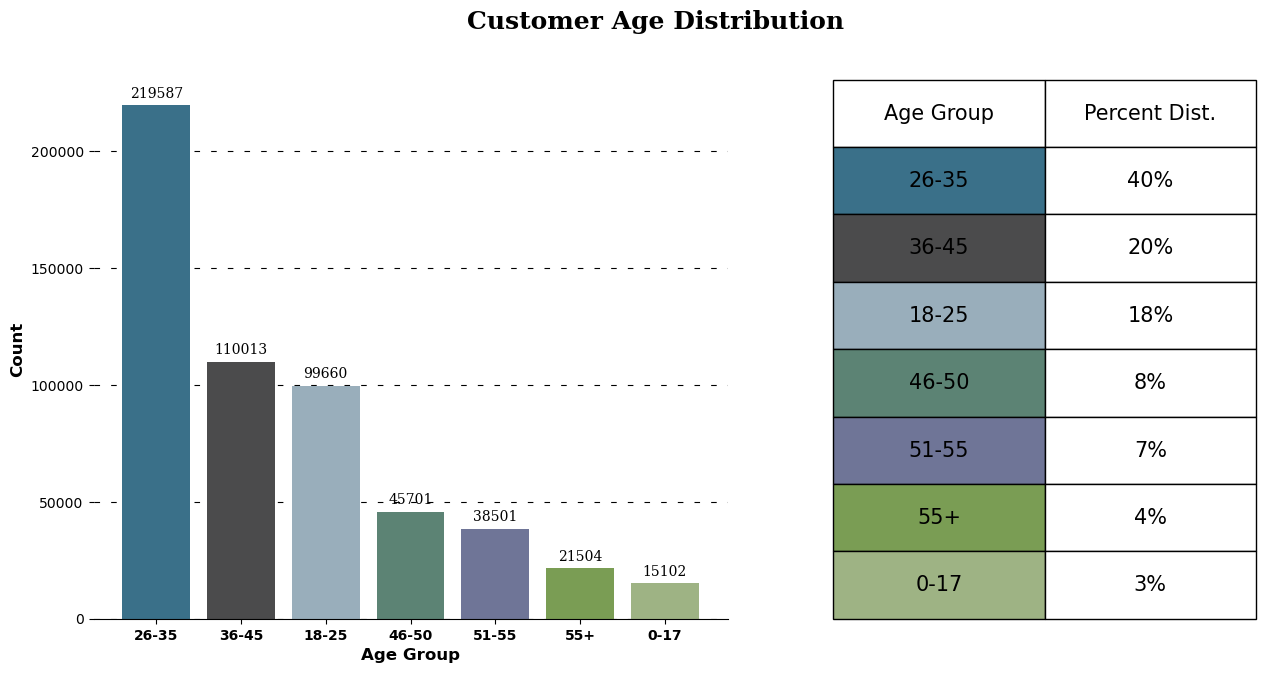

In [19]:
#setting the plot style
fig = plt.figure(figsize = (15,7))
gs = fig.add_gridspec(1,2,width_ratios=[0.6, 0.4])

                                        # creating bar chart for age disribution
    
ax0 = fig.add_subplot(gs[0,0])
temp = df['Age'].value_counts()
color_map = ["#3A7089", "#4b4b4c",'#99AEBB','#5C8374','#6F7597','#7A9D54','#9EB384']
ax0.bar(x=temp.index,height = temp.values,color = color_map,zorder = 2)

#adding the value_counts
for i in temp.index:
    ax0.text(i,temp[i]+5000,temp[i],{'font':'serif','size' : 10},ha = 'center',va = 'center')

#adding grid lines
ax0.grid(color = 'black',linestyle = '--', axis = 'y', zorder = 0, dashes = (5,10))

#removing the axis lines
for s in ['top','left','right']:
    ax0.spines[s].set_visible(False)
    
#adding axis label
ax0.set_ylabel('Count',fontweight = 'bold',fontsize = 12)
ax0.set_xlabel('Age Group',fontweight = 'bold',fontsize = 12)
ax0.set_xticklabels(temp.index,fontweight = 'bold')



                                        #creating a info table for age
        
ax1 = fig.add_subplot(gs[0,1])
age_info = age_info = [['26-35','40%'],['36-45','20%'],['18-25','18%'],['46-50','8%'],['51-55','7%'],['55+','4%'],
                       ['0-17','3%']]   
color_2d = [["#3A7089",'#FFFFFF'],["#4b4b4c",'#FFFFFF'],['#99AEBB','#FFFFFF'],['#5C8374','#FFFFFF'],['#6F7597','#FFFFFF'],
            ['#7A9D54','#FFFFFF'],['#9EB384','#FFFFFF']]

table = ax1.table(cellText = age_info, cellColours=color_2d, cellLoc='center',colLabels =['Age Group','Percent Dist.'],
                  colLoc = 'center',bbox =[0, 0, 1, 1])

table.set_fontsize(15)

#removing axis 
ax1.axis('off')

#setting title for visual
fig.suptitle('Customer Age Distribution',font = 'serif', size = 18, weight = 'bold')

plt.show()

#### Insights
* The age group of 26-35 represents the largest share of Walmart's Black Friday sales, accounting for 40% of the sales. This suggests that the young and middle-aged adults are the most active and interested in shopping for deals and discounts.

* The 36-45 and 18-25 age groups are the second and third largest segments, respectively, with 20% and 18% of the sales. This indicates that Walmart has a diverse customer base that covers different life stages and preferences..

* The 46-50, 51-55, 55+, and 0-17 age groups are the smallest customer segments, with less than 10% of the total sales each. This implies that Walmart may need to improve its marketing strategies and product offerings to attract more customers from these age groups, especially the seniors and the children.

## Customer Stay In current City Distribution

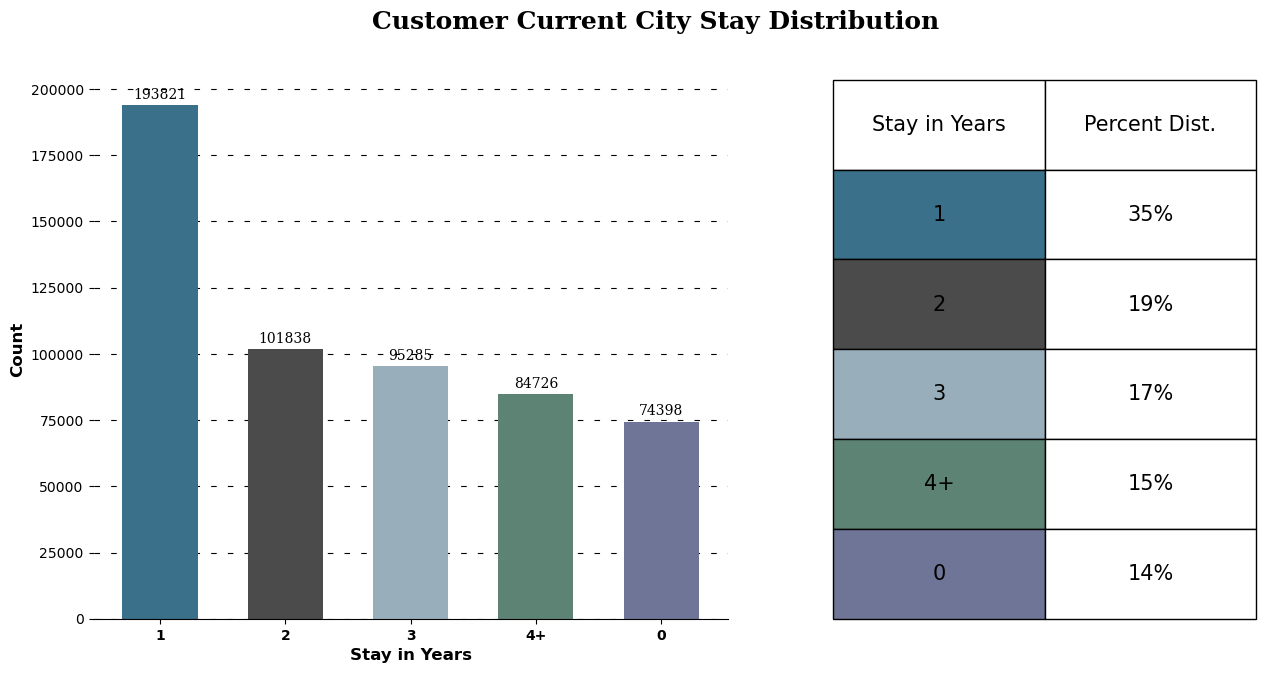

In [20]:
#setting the plot style
fig = plt.figure(figsize = (15,7))
gs = fig.add_gridspec(1,2,width_ratios=[0.6, 0.4])

                            # creating bar chart for Customer Stay In current City
    
ax1 = fig.add_subplot(gs[0,0])
temp = df['Stay_In_Current_City_Years'].value_counts()
color_map = ["#3A7089", "#4b4b4c",'#99AEBB','#5C8374','#6F7597']
ax1.bar(x=temp.index,height = temp.values,color = color_map,zorder = 2,width = 0.6)

#adding the value_counts
for i in temp.index:
    ax1.text(i,temp[i]+4000,temp[i],{'font':'serif','size' : 10},ha = 'center',va = 'center')

#adding grid lines
ax1.grid(color = 'black',linestyle = '--', axis = 'y', zorder = 0, dashes = (5,10))

#removing the axis lines
for s in ['top','left','right']:
    ax1.spines[s].set_visible(False)
    
#adding axis label
ax1.set_ylabel('Count',fontweight = 'bold',fontsize = 12)
ax1.set_xlabel('Stay in Years',fontweight = 'bold',fontsize = 12)
ax1.set_xticklabels(temp.index,fontweight = 'bold')



                                        #creating a info table for Customer Stay In current City
        
ax2 = fig.add_subplot(gs[0,1])
stay_info = [['1','35%'],['2','19%'],['3','17%'],['4+','15%'],['0','14%']]
color_2d = [["#3A7089",'#FFFFFF'],["#4b4b4c",'#FFFFFF'],['#99AEBB','#FFFFFF'],['#5C8374','#FFFFFF'],['#6F7597','#FFFFFF']]

table = ax2.table(cellText = stay_info, cellColours=color_2d, cellLoc='center',colLabels =['Stay in Years','Percent Dist.'],
                  colLoc = 'center',bbox =[0, 0, 1, 1])

table.set_fontsize(15)

#removing axis 
ax2.axis('off')

#setting title for visual
fig.suptitle('Customer Current City Stay Distribution',font = 'serif', size = 18, weight = 'bold')

plt.show()

##### Insights
* The data suggests that the customers are either new to the city or move frequently, and may have different preferences and needs than long-term residents.

* The majority of the customers (49%) have stayed in the current city for one year or less. This suggests that Walmart has a strong appeal to newcomers who may be looking for affordable and convenient shopping options.

* 4+ years category (14%) customers indicates that Walmart has a loyal customer base who have been living in the same city for a long time.

* The percentage of customers decreases as the stay in the current city increases which suggests that Walmart may benefit from targeting long-term residents for loyalty programs and promotions.

### Top 10 Products and Categories: Sales Snapshot
* Top 10 Products and Product Categories which has sold most during Black Friday Sales

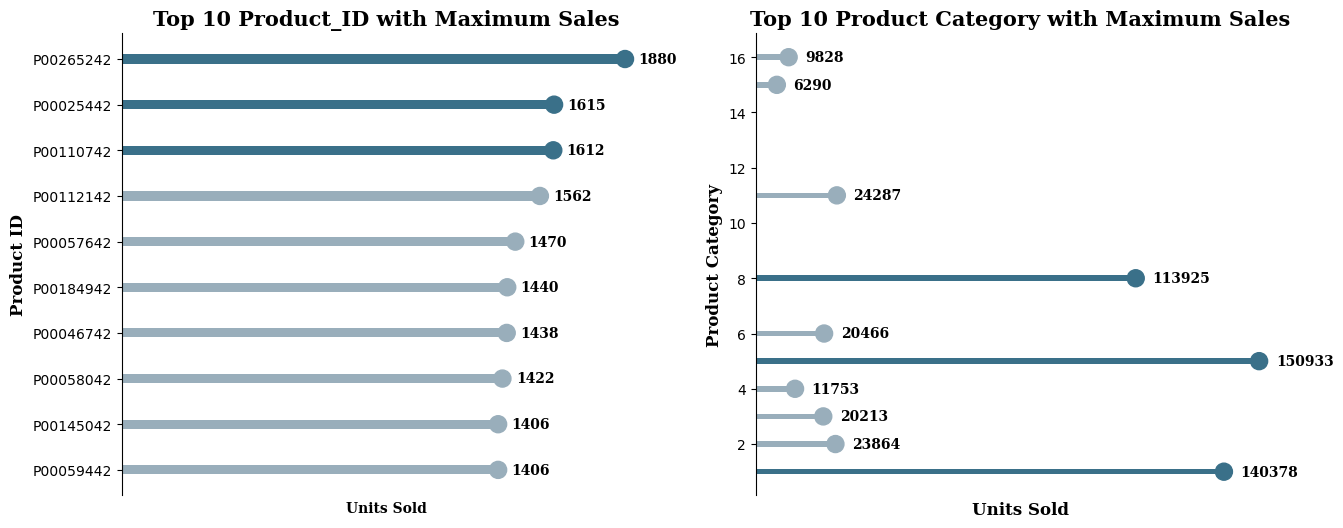

In [21]:
#setting the plot style
fig = plt.figure(figsize = (15,6))
gs = fig.add_gridspec(1,2)

                                        #Top 10 Product_ID Sales

ax = fig.add_subplot(gs[0,0])

temp = df['Product_ID'].value_counts()[0:10]

# reversing the list
temp = temp.iloc[-1:-11:-1]

color_map =  ['#99AEBB' for i in range(7)] + ["#3A7089" for i in range(3)] 
#creating the plot
ax.barh(y = temp.index,width = temp.values,height = 0.2,color = color_map)
ax.scatter(y = temp.index, x = temp.values, s = 150 , color = color_map )

#removing x-axis
ax.set_xticks([])

#adding label to each bar
for y,x in zip(temp.index,temp.values):
    ax.text( x + 50 , y , x,{'font':'serif', 'size':10,'weight':'bold'},va='center')

#removing the axis lines
for s in ['top','bottom','right']:
    ax.spines[s].set_visible(False)
    
#adding axis labels
ax.set_xlabel('Units Sold',{'font':'serif', 'size':10,'weight':'bold'})
ax.set_ylabel('Product ID',{'font':'serif', 'size':12,'weight':'bold'})

#creating the title    
ax.set_title('Top 10 Product_ID with Maximum Sales',
            {'font':'serif', 'size':15,'weight':'bold'})


                                        #Top 10 Product Category Sales
ax = fig.add_subplot(gs[0,1])

temp = df['Product_Category'].value_counts()[0:10]

# reversing the list
temp = temp.iloc[-1:-11:-1]

#creating the plot
ax.barh(y = temp.index,width = temp.values,height = 0.2,color = color_map)
ax.scatter(y = temp.index, x = temp.values, s = 150 , color = color_map )

#removing x-axis
ax.set_xticks([])

#adding label to each bar
for y,x in zip(temp.index,temp.values):
    ax.text( x + 5000 , y , x,{'font':'serif', 'size':10,'weight':'bold'},va='center')

#removing the axis lines
for s in ['top','bottom','right']:
    ax.spines[s].set_visible(False)
    
#adding axis labels
ax.set_xlabel('Units Sold',{'font':'serif', 'size':12,'weight':'bold'})
ax.set_ylabel('Product Category',{'font':'serif', 'size':12,'weight':'bold'})

#creating the title    
ax.set_title('Top 10 Product Category with Maximum Sales',
            {'font':'serif', 'size':15,'weight':'bold'})

plt.show()

##### Insights
* Top 10 Products Sold - The top-selling products during Walmart's Black Friday sales are characterized by a relatively small variation in sales numbers, suggesting that Walmart offers a variety of products that many different customers like to buy.

* Top 10 Product Categories - Categories 5,1 and 8 have significantly outperformed other categories with combined Sales of nearly 75% of the total sales suggesting a strong preference for these products among customers.

### Top 10 Customer Occupation
* Top 10 Occupation of Customer  in Black Friday Sales

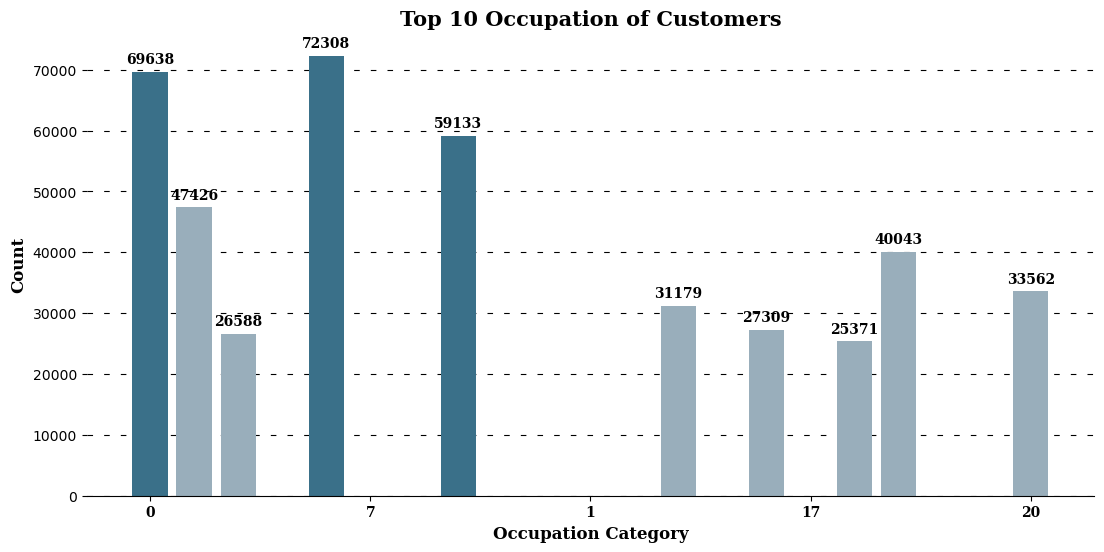

In [22]:
temp = df['Occupation'].value_counts()[0:10]

#setting the plot style
fig,ax = plt.subplots(figsize = (13,6))

color_map =  ["#3A7089" for i in range(3)] +  ['#99AEBB' for i in range(7)] 

#creating the plot
ax.bar(temp.index,temp.values,color = color_map,zorder = 2)

#adding valuecounts
for x,y in zip(temp.index,temp.values):
    ax.text(x, y + 2000, y,{'font':'serif', 'size':10,'weight':'bold'},va='center',ha = 'center')
    
#setting grid style
ax.grid(color = 'black',linestyle = '--',axis = 'y',zorder = 0,dashes = (5,10))

#customizing the axis labels
ax.set_xticklabels(temp.index,fontweight = 'bold',fontfamily='serif')
ax.set_xlabel('Occupation Category',{'font':'serif', 'size':12,'weight':'bold'})
ax.set_ylabel('Count',{'font':'serif', 'size':12,'weight':'bold'})

#removing the axis lines

for s in ['top','left','right']:
    ax.spines[s].set_visible(False)
    
#adding title to the visual
ax.set_title('Top 10 Occupation of Customers',
            {'font':'serif', 'size':15,'weight':'bold'})

plt.show()

#### Insights
* Customers with Occupation category 4,0 and 7 contributed significantly i.e. almost 37% of the total purchases suggesting that these occupations have a high demand for Walmart products or services, or that they have more disposable income to spend on Black Friday.

# Bivariate Analysis
#### Exploring Purchase Patterns
##### Boxplots of Purchase Amount Across various Variables

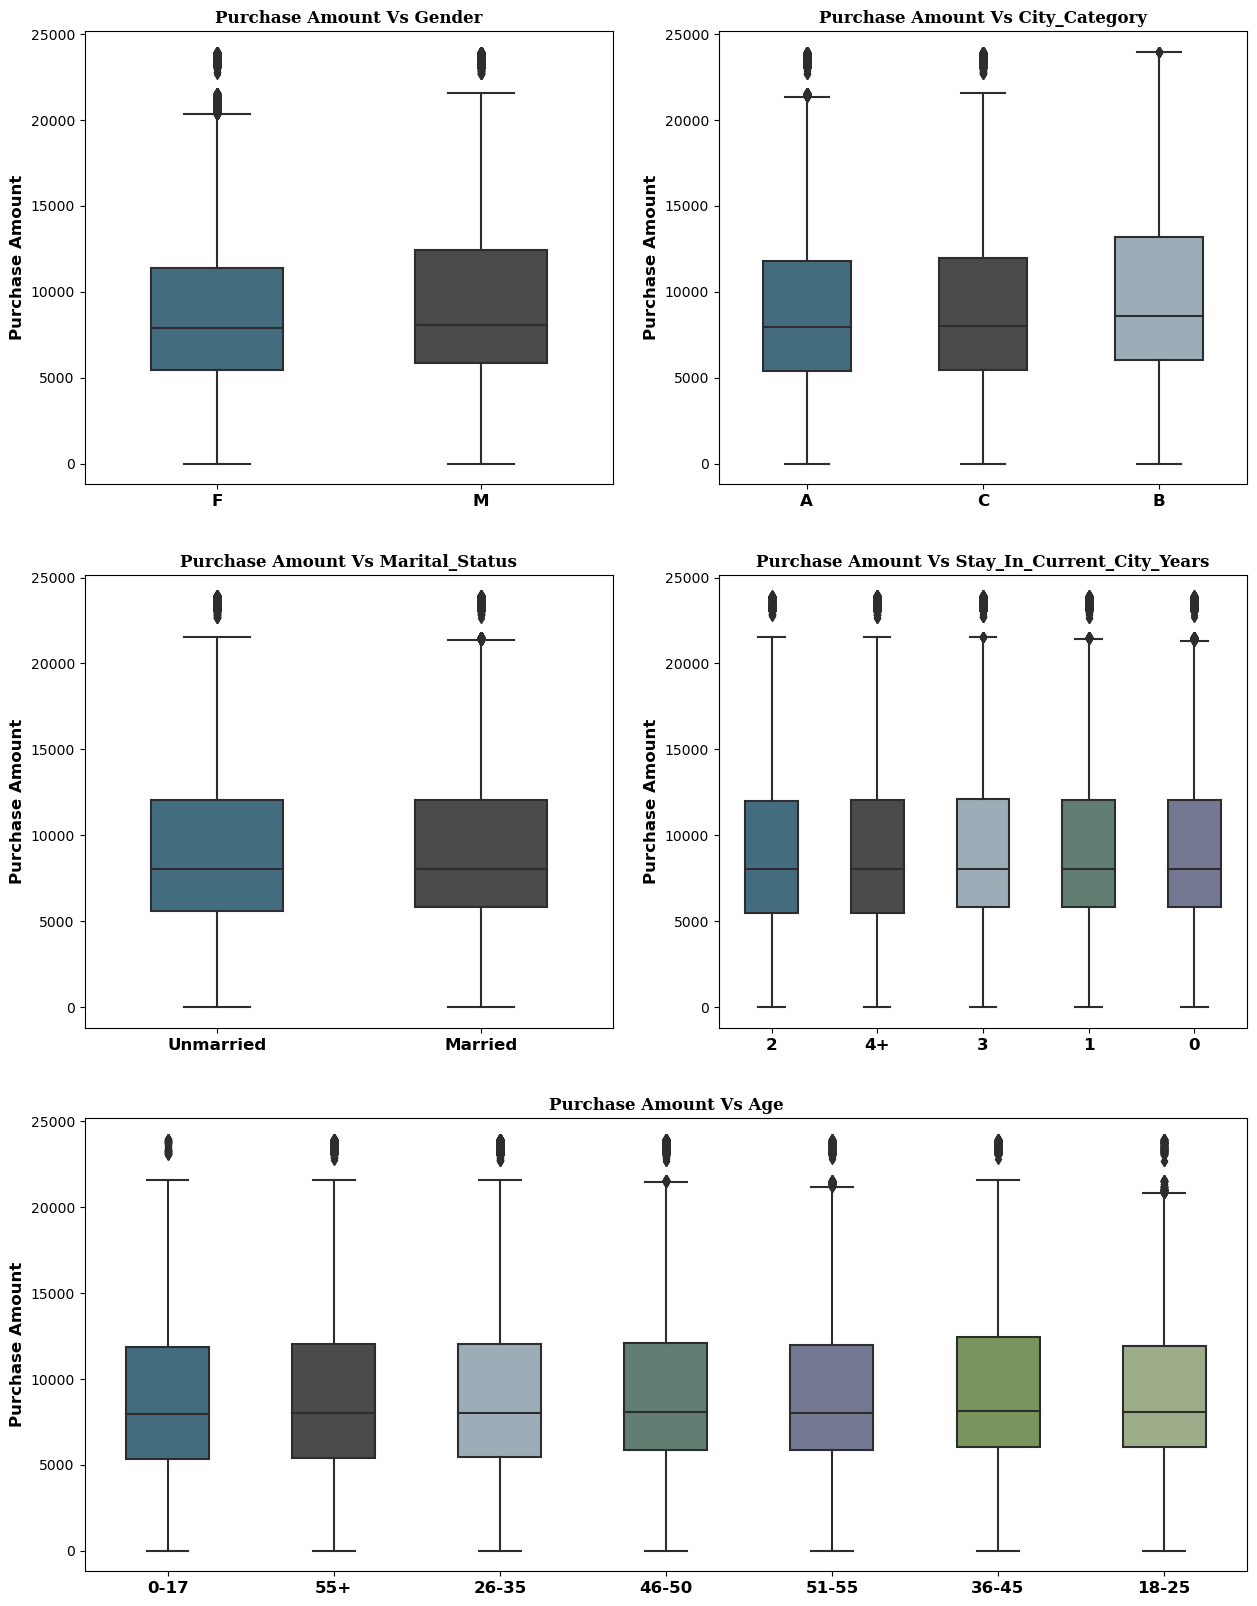

In [23]:
#setting the plot style
fig = plt.figure(figsize = (15,20))
gs = fig.add_gridspec(3,2)

for i,j,k in [(0,0,'Gender'),(0,1,'City_Category'),(1,0,'Marital_Status'),(1,1,'Stay_In_Current_City_Years'),(2,1,'Age')]:
     
    #plot position
    if i <= 1:
        ax0 = fig.add_subplot(gs[i,j])
    else:
        ax0 = fig.add_subplot(gs[i,:])
        
    #plot
    color_map = ["#3A7089", "#4b4b4c",'#99AEBB','#5C8374','#6F7597','#7A9D54','#9EB384']
    sns.boxplot(data = df, x = k, y  = 'Purchase' ,ax = ax0,width = 0.5, palette =color_map)

    #plot title
    ax0.set_title(f'Purchase Amount Vs {k}',{'font':'serif', 'size':12,'weight':'bold'})
    
    #customizing axis
    ax0.set_xticklabels(df[k].unique(),fontweight = 'bold',fontsize = 12)
    ax0.set_ylabel('Purchase Amount',fontweight = 'bold',fontsize = 12)
    ax0.set_xlabel('')
    

plt.show()

##### Insights
* Out of all the variables analysed above, it's noteworthy that the purchase amount remains relatively stable regardless of the variable under consideration. As indicated in the data, the median purchase amount consistently hovers around 8,000 USD, regardless of the specific variable being examined.

### Gender VS Purchase Amount
##### Data Visualization

In [24]:
#creating a df for purchase amount vs gender
temp = df.groupby('Gender')['Purchase'].agg(['sum','count']).reset_index()

#calculating the amount in billions
temp['sum_in_billions'] = round(temp['sum'] / 10**9,2)

#calculationg percentage distribution of purchase amount
temp['%sum'] = round(temp['sum']/temp['sum'].sum(),3)

#calculationg per purchase amount
temp['per_purchase'] = round(temp['sum']/temp['count'])

#renaming the gender
temp['Gender'] = temp['Gender'].replace({'F':'Female','M':'Male'})

temp

,Gender,sum,count,sum_in_billions,%sum,per_purchase
0,Female,1186232642,135809,1.19,0.233,8735.0
1,Male,3909580100,414259,3.91,0.767,9438.0


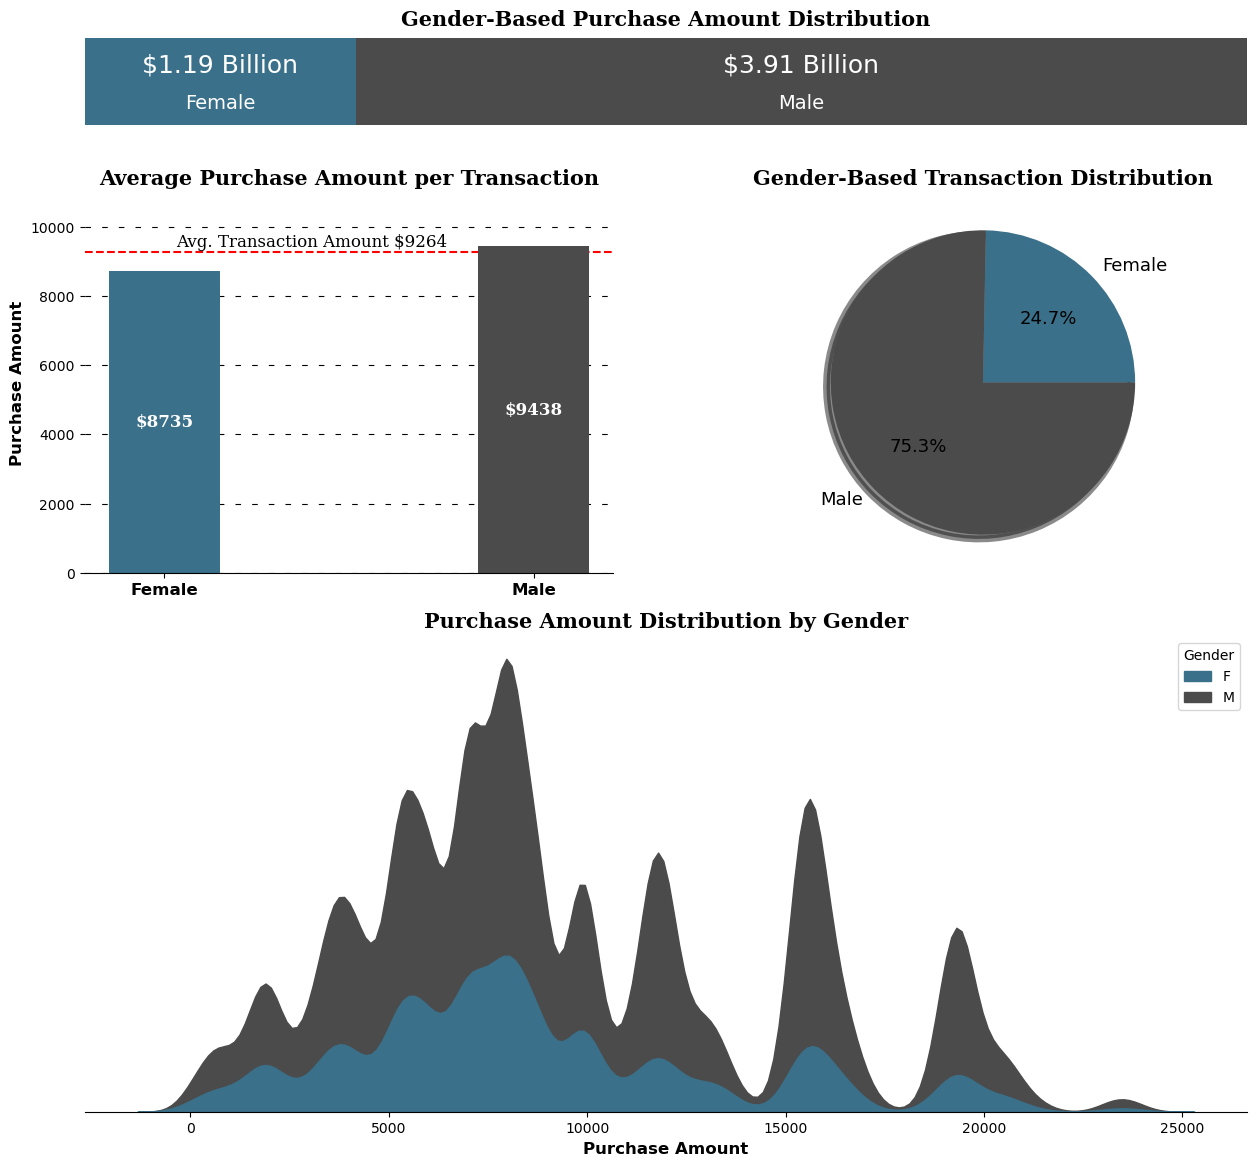

In [25]:
#setting the plot style
fig = plt.figure(figsize = (15,14))
gs = fig.add_gridspec(3,2,height_ratios =[0.10,0.4,0.5])


                                        #Distribution of Purchase Amount
ax = fig.add_subplot(gs[0,:])

#plotting the visual
ax.barh(temp.loc[0,'Gender'],width = temp.loc[0,'%sum'],color = "#3A7089",label = 'Female')
ax.barh(temp.loc[0,'Gender'],width = temp.loc[1,'%sum'],left =temp.loc[0,'%sum'], color =  "#4b4b4c",label = 'Male' )

#inserting the text
txt = [0.0] #for left parameter in ax.text()

for i in temp.index:
    #for amount
    ax.text(temp.loc[i,'%sum']/2 + txt[0],0.15,f"${temp.loc[i,'sum_in_billions']} Billion",
           va = 'center', ha='center',fontsize=18, color='white')
    
    #for gender
    ax.text(temp.loc[i,'%sum']/2 + txt[0],- 0.20 ,f"{temp.loc[i,'Gender']}",
           va = 'center', ha='center',fontsize=14, color='white')    
    
    txt += temp.loc[i,'%sum']
    
#removing the axis lines
for s in ['top','left','right','bottom']:
    ax.spines[s].set_visible(False)
    
#customizing ticks
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlim(0,1)

#plot title
ax.set_title('Gender-Based Purchase Amount Distribution',{'font':'serif', 'size':15,'weight':'bold'})


                                            #Distribution of Purchase Amount per Transaction
    
ax1 = fig.add_subplot(gs[1,0])

color_map = ["#3A7089", "#4b4b4c"]

#plotting the visual
ax1.bar(temp['Gender'],temp['per_purchase'],color = color_map,zorder = 2,width = 0.3)

#adding average transaction line
avg = round(df['Purchase'].mean())

ax1.axhline(y = avg, color ='red', zorder = 0,linestyle = '--')

#adding text for the line
ax1.text(0.4,avg + 300, f"Avg. Transaction Amount ${avg:.0f}",
         {'font':'serif','size' : 12},ha = 'center',va = 'center')

#adjusting the ylimits
ax1.set_ylim(0,11000)

#adding the value_counts
for i in temp.index:
    ax1.text(temp.loc[i,'Gender'],temp.loc[i,'per_purchase']/2,f"${temp.loc[i,'per_purchase']:.0f}",
             {'font':'serif','size' : 12,'color':'white','weight':'bold' },ha = 'center',va = 'center')
    
#adding grid lines
ax1.grid(color = 'black',linestyle = '--', axis = 'y', zorder = 0, dashes = (5,10))

#removing the axis lines
for s in ['top','left','right']:
    ax1.spines[s].set_visible(False)
    
#adding axis label
ax1.set_ylabel('Purchase Amount',fontweight = 'bold',fontsize = 12)
ax1.set_xticklabels(temp['Gender'],fontweight = 'bold',fontsize = 12)

#setting title for visual
ax1.set_title('Average Purchase Amount per Transaction',{'font':'serif', 'size':15,'weight':'bold'})

                                        # creating pie chart for gender disribution
ax2 = fig.add_subplot(gs[1,1])

color_map = ["#3A7089", "#4b4b4c"]
ax2.pie(temp['count'],labels = temp['Gender'],autopct = '%.1f%%',
        shadow = True,colors = color_map,wedgeprops = {'linewidth': 5},textprops={'fontsize': 13, 'color': 'black'})

#setting title for visual
ax2.set_title('Gender-Based Transaction Distribution',{'font':'serif', 'size':15,'weight':'bold'})

                                        # creating kdeplot for purchase amount distribution

ax3 = fig.add_subplot(gs[2,:])

#plotting the kdeplot
sns.kdeplot(data = df, x = 'Purchase', hue = 'Gender', palette = color_map,fill = True, alpha = 1,ax = ax3)

#removing the axis lines
for s in ['top','left','right']:
    ax3.spines[s].set_visible(False)
    
# adjusting axis labels
ax3.set_yticks([])
ax3.set_ylabel('')
ax3.set_xlabel('Purchase Amount',fontweight = 'bold',fontsize = 12)

#setting title for visual
ax3.set_title('Purchase Amount Distribution by Gender',{'font':'serif', 'size':15,'weight':'bold'})

plt.show()

##### Insights
* Total Sales and Transactions Comparison

* The total purchase amount and number of transactions by male customers was more than three times the amount and transactions by female customers indicating that they had a more significant impact on the Black Friday sales.

* Average Transaction Value

* The average purchase amount per transaction was slightly higher for male customers than female customers (9438 vs 8735).

* Distribution of Purchase Amount

* As seen above, the purchase amount for both the genders is not normally distributed.

# Confidence Interval Construction: 

##### Estimating Average Purchase Amount per Transaction

* Step 1 - Building CLT Curve

* As seen above, the purchase amount distribution is not Normal. So we need to use Central Limit Theorem. It states the distribution of sample means will approximate a normal distribution, regardless of the underlying population distribution

* Step 2 - Building Confidence Interval

* After building CLT curve, we will create a confidence interval predicting population mean at 99%,95% and 90% Confidence level.
##### Note - We will use different sample sizes of [100,1000,5000,50000]

In [26]:
#creating a function to calculate confidence interval

def confidence_interval(data,ci):
    #converting the list to series
    l_ci = (100-ci)/2
    u_ci = (100+ci)/2
    
    #calculating lower limit and upper limit of confidence interval
    interval = np.percentile(data,[l_ci,u_ci]).round(0)
    
    return interval

In [27]:
#defining a function for plotting the visual for given confidence interval

def plot(ci):

    #setting the plot style
    fig = plt.figure(figsize = (15,8))
    gs = fig.add_gridspec(2,2)

    #creating separate data frames for each gender
    df_male = df.loc[df['Gender'] == 'M','Purchase']
    df_female = df.loc[df['Gender'] == 'F','Purchase']

    #sample sizes and corresponding plot positions
    sample_sizes = [(100,0,0),(1000,0,1),(5000,1,0),(50000,1,1)]

    #number of samples to be taken from purchase amount
    bootstrap_samples = 20000

    male_samples = {}
    female_samples = {}
    
    for i,x,y in sample_sizes:
        male_means = [] #list for collecting the means of male sample
        female_means = [] #list for collecting the means of female sample

        for j in range(bootstrap_samples):

            #creating random 5000 samples of i sample size
            male_bootstrapped_samples = np.random.choice(df_male,size = i)
            female_bootstrapped_samples = np.random.choice(df_female,size = i)

            #calculating mean of those samples
            male_sample_mean = np.mean(male_bootstrapped_samples)
            female_sample_mean = np.mean(female_bootstrapped_samples)

            #appending the mean to the list
            male_means.append(male_sample_mean)
            female_means.append(female_sample_mean)
            
        #storing the above sample generated
        male_samples[f'{ci}%_{i}'] = male_means
        female_samples[f'{ci}%_{i}'] = female_means

        #creating a temporary dataframe for creating kdeplot
        temp_df = pd.DataFrame(data = {'male_means':male_means,'female_means':female_means})

                                                        #plotting kdeplots
        #plot position
        ax = fig.add_subplot(gs[x,y])
        
        #plots for male and female
        sns.kdeplot(data = temp_df,x = 'male_means',color ="#3A7089" ,fill = True, alpha = 0.5,ax = ax,label = 'Male')
        sns.kdeplot(data = temp_df,x = 'female_means',color ="#4b4b4c" ,fill = True, alpha = 0.5,ax = ax,label = 'Female')

        #calculating confidence intervals for given confidence level(ci)
        m_range = confidence_interval(male_means,ci)
        f_range = confidence_interval(female_means,ci)

        #plotting confidence interval on the distribution
        for k in m_range:
            ax.axvline(x = k,ymax = 0.9, color ="#3A7089",linestyle = '--')

        for k in f_range:
            ax.axvline(x = k,ymax = 0.9, color ="#4b4b4c",linestyle = '--')


        #removing the axis lines
        for s in ['top','left','right']:
            ax.spines[s].set_visible(False)

        # adjusting axis labels
        ax.set_yticks([])
        ax.set_ylabel('')
        ax.set_xlabel('')

        #setting title for visual
        ax.set_title(f'CLT Curve for Sample Size = {i}',{'font':'serif', 'size':11,'weight':'bold'})

        plt.legend()
    
    #setting title for visual
    fig.suptitle(f'{ci}% Confidence Interval',font = 'serif', size = 18, weight = 'bold')

    plt.show()
    
    return male_samples,female_samples

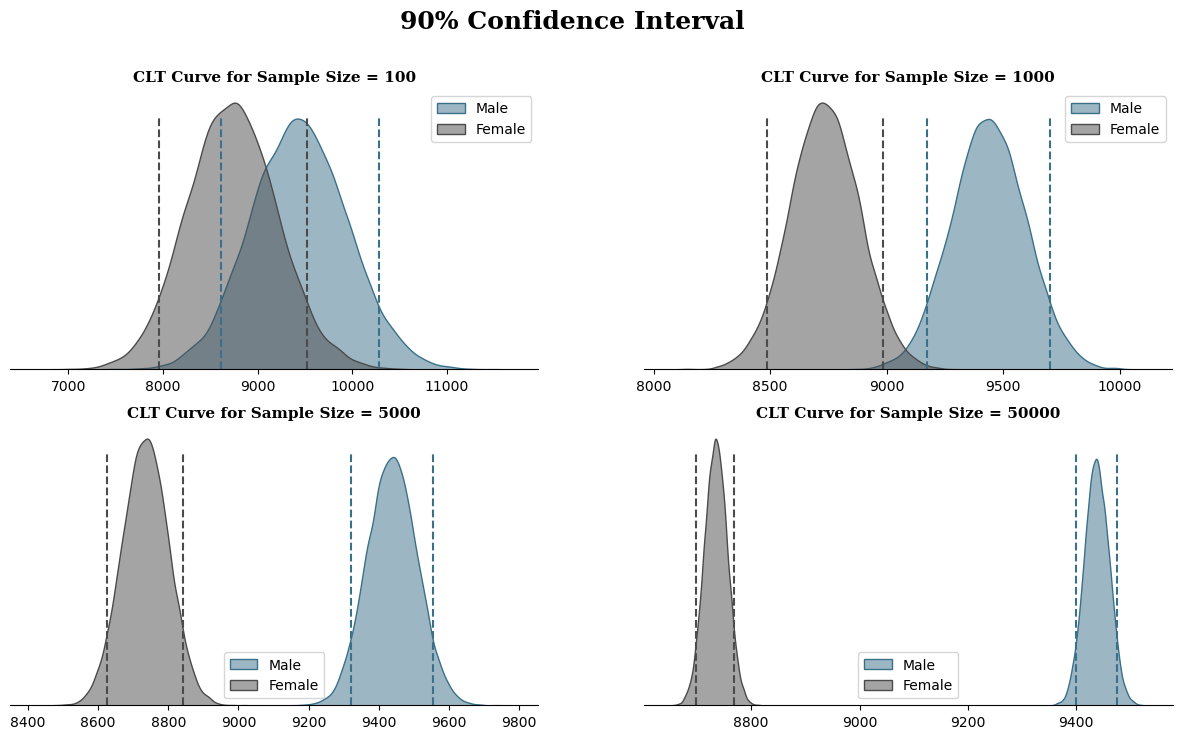

In [28]:
m_samp_90,f_samp_90 = plot(90)

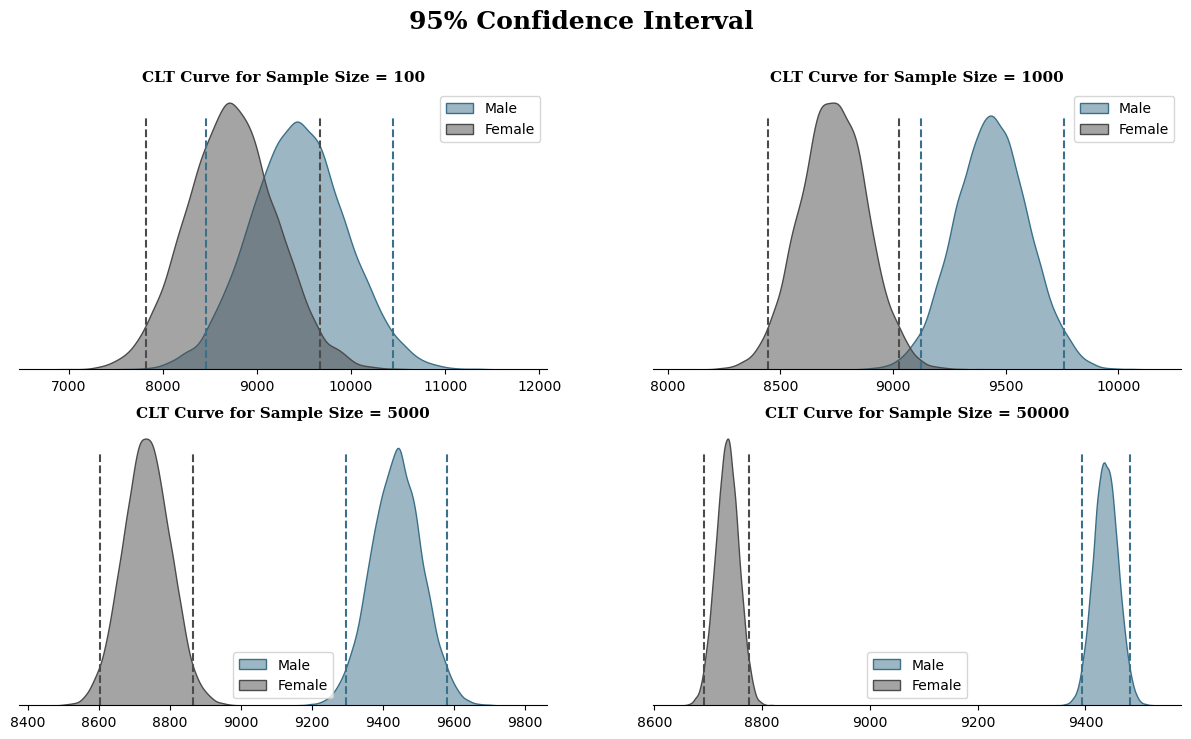

In [29]:
m_samp_95,f_samp_95 = plot(95)

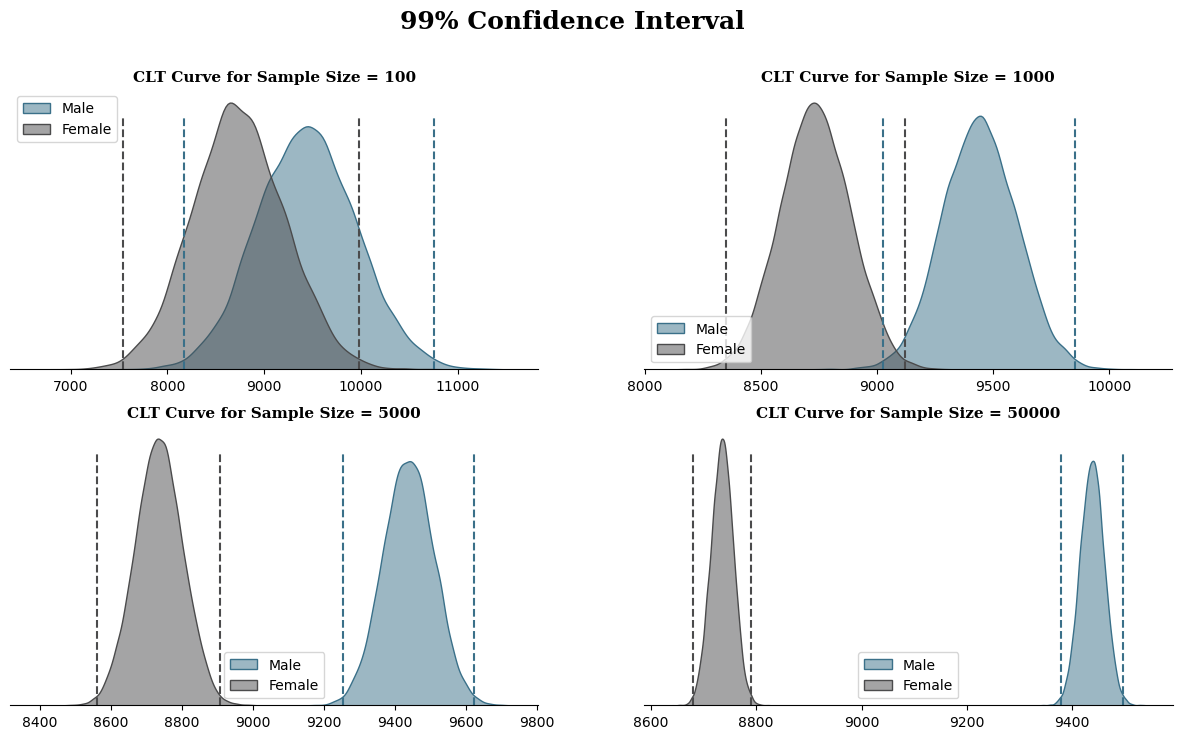

In [31]:
m_samp_99,f_samp_99 = plot(99)

# Are confidence intervals of average male and female spending overlapping?

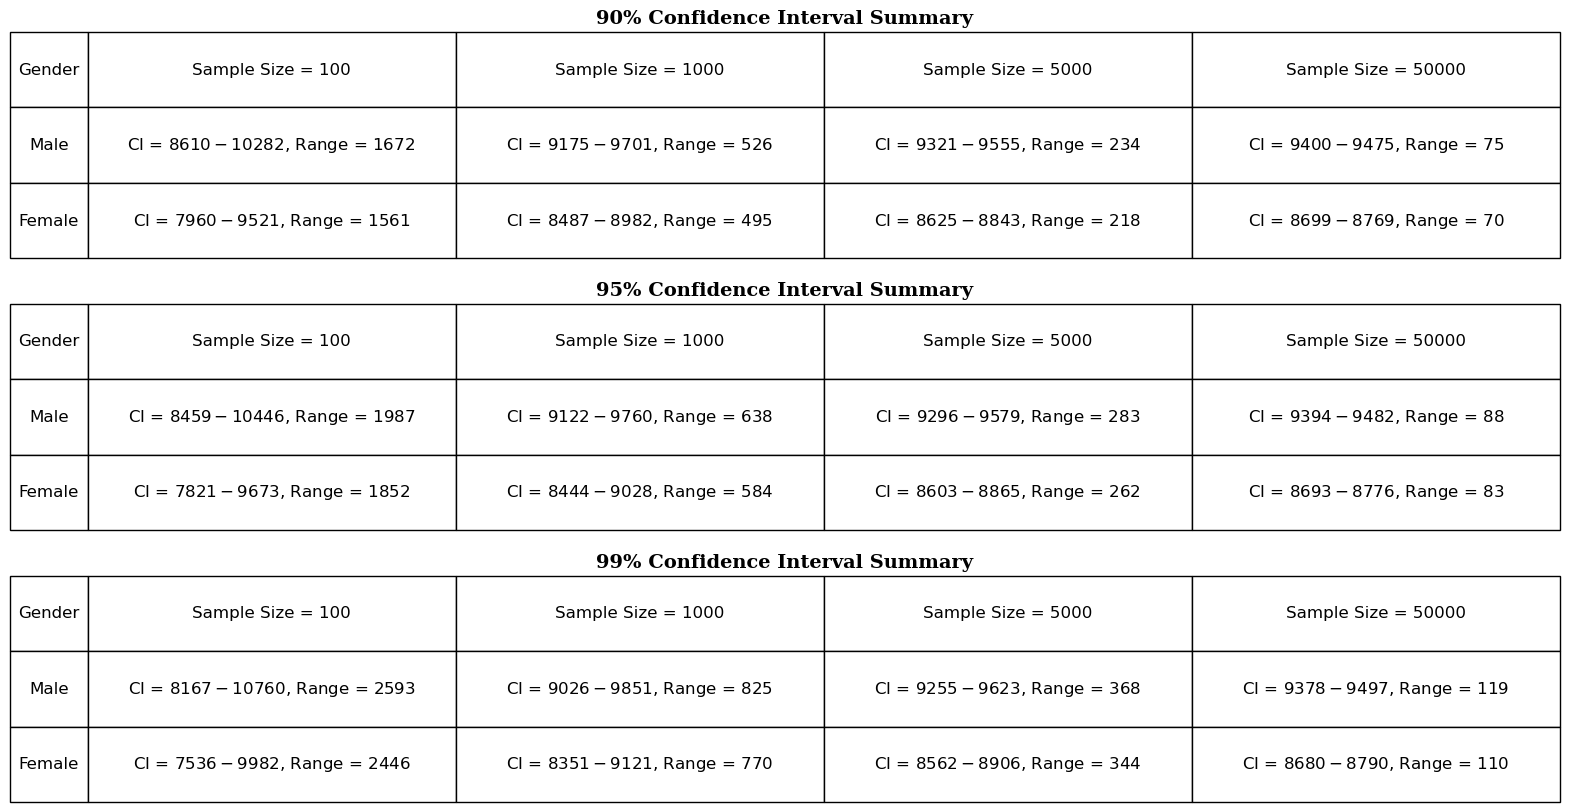

In [32]:
fig = plt.figure(figsize = (20,10))
gs = fig.add_gridspec(3,1)

for i,j,k,l in [(m_samp_90,f_samp_90,90,0),(m_samp_95,f_samp_95,95,1),(m_samp_99,f_samp_99,99,2)]:
    #list for collecting ci for given cl
    m_ci = ['Male'] 
    f_ci = ['Female'] 
    
    #finding ci for each sample size (males)
    for m in i:  
        m_range = confidence_interval(i[m],k)
        m_ci.append(f"CI = ${m_range[0]:.0f} - ${m_range[1]:.0f}, Range = {(m_range[1] - m_range[0]):.0f}")
        
    #finding ci for each sample size (females)
    for f in j:  
        f_range = confidence_interval(j[f],k)
        f_ci.append(f"CI = ${f_range[0]:.0f} - ${f_range[1]:.0f}, Range = {(f_range[1] - f_range[0]):.0f}")
    
                                        #plotting the summary
    ax = fig.add_subplot(gs[l])
    
    #contents of the table
    ci_info = [m_ci,f_ci]
    
    #plotting the table
    table = ax.table(cellText = ci_info, cellLoc='center',
                     colLabels =['Gender','Sample Size = 100','Sample Size = 1000','Sample Size = 5000','Sample Size = 50000'],
                     colLoc = 'center',colWidths = [0.05,0.2375,0.2375,0.2375,0.2375],bbox =[0, 0, 1, 1])

    table.set_fontsize(13)

    #removing axis 
    ax.axis('off')
    
    #setting title
    ax.set_title(f"{k}% Confidence Interval Summary",{'font':'serif', 'size':14,'weight':'bold'})

##### Insights
* Sample Size

* The analysis highlights the importance of sample size in estimating population parameters. It suggests that as the sample size increases, the confidence intervals become narrower and more precise. In business, this implies that larger sample sizes can provide more reliable insights and estimates.

* Confidence Intervals

* From the above analysis, we can see that except for the Sample Size of 100, the confidence interval do not overlap as the sample size increases. This means that there is a statistically significant difference between the average spending per transaction for men and women within the given samples.

* Population Average

* We are 95% confident that the true population average for males falls between 9,393 and 9,483, and for females, it falls between 8,692 and 8,777.

* Women spend less

* Men tend to spend more money per transaction on average than women, as the upper bounds of the confidence intervals for men are consistently higher than those for women across different sample sizes.


### How can Walmart leverage this conclusion to make changes or improvements?

* Segmentation Opportunities

* Walmart can create targeted marketing campaigns, loyalty programs, or product bundles to cater to the distinct spending behaviors of male and female customers. This approach may help maximize revenue from each customer segment.

# Pricing Strategies

* Based on the above data of average spending per transaction by gender, they might adjust pricing or discount strategies to incentivize higher spending among male customers while ensuring competitive pricing for female-oriented products.

* Note
* Moving forward in our analysis, we will use 95% Confidence Level only.
* Marital Status VS Purchase Amount
*Data Visualization

In [33]:
#creating a df for purchase amount vs marital status
temp = df.groupby('Marital_Status')['Purchase'].agg(['sum','count']).reset_index()

#calculating the amount in billions
temp['sum_in_billions'] = round(temp['sum'] / 10**9,2)

#calculationg percentage distribution of purchase amount
temp['%sum'] = round(temp['sum']/temp['sum'].sum(),3)

#calculationg per purchase amount
temp['per_purchase'] = round(temp['sum']/temp['count'])

temp

,Marital_Status,sum,count,sum_in_billions,%sum,per_purchase
0,Unmarried,3008927447,324731,3.01,0.59,9266.0
1,Married,2086885295,225337,2.09,0.41,9261.0


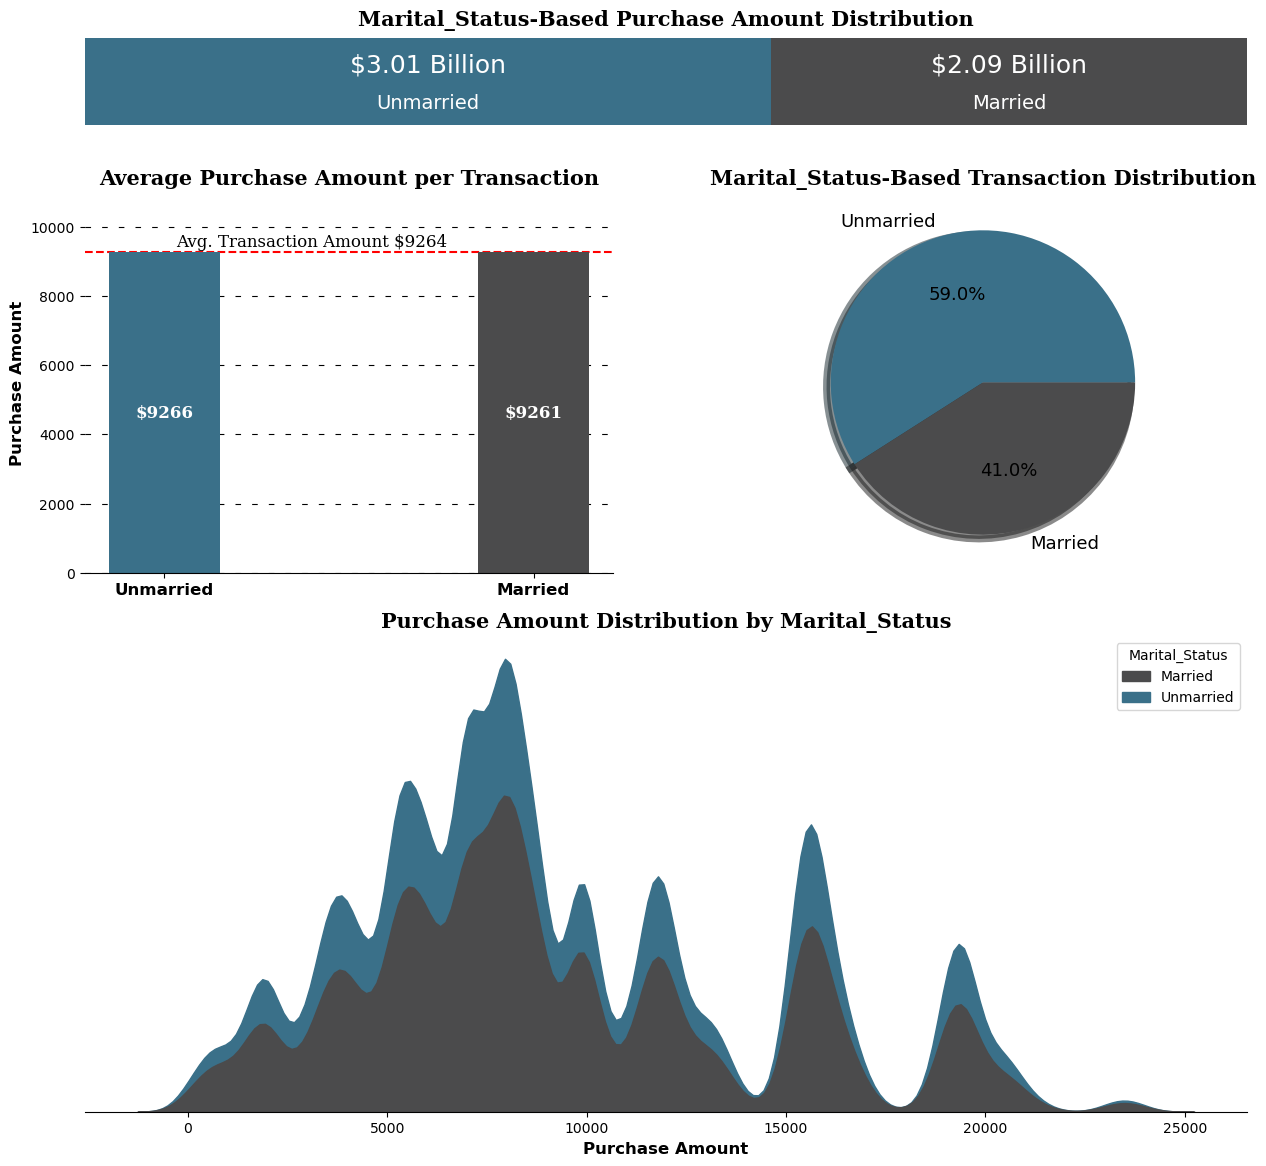

In [34]:
#setting the plot style
fig = plt.figure(figsize = (15,14))
gs = fig.add_gridspec(3,2,height_ratios =[0.10,0.4,0.5])


                                        #Distribution of Purchase Amount
ax = fig.add_subplot(gs[0,:])

#plotting the visual
ax.barh(temp.loc[0,'Marital_Status'],width = temp.loc[0,'%sum'],color = "#3A7089",label = 'Unmarried')
ax.barh(temp.loc[0,'Marital_Status'],width = temp.loc[1,'%sum'],left =temp.loc[0,'%sum'], color =  "#4b4b4c",label = 'Married')

#inserting the text
txt = [0.0] #for left parameter in ax.text()

for i in temp.index:
    #for amount
    ax.text(temp.loc[i,'%sum']/2 + txt[0],0.15,f"${temp.loc[i,'sum_in_billions']} Billion",
           va = 'center', ha='center',fontsize=18, color='white')
    
    #for marital status
    ax.text(temp.loc[i,'%sum']/2 + txt[0],- 0.20 ,f"{temp.loc[i,'Marital_Status']}",
           va = 'center', ha='center',fontsize=14, color='white')    
    
    txt += temp.loc[i,'%sum']
    
#removing the axis lines
for s in ['top','left','right','bottom']:
    ax.spines[s].set_visible(False)
    
#customizing ticks
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlim(0,1)

#plot title
ax.set_title('Marital_Status-Based Purchase Amount Distribution',{'font':'serif', 'size':15,'weight':'bold'})


                                            #Distribution of Purchase Amount per Transaction
    
ax1 = fig.add_subplot(gs[1,0])

color_map = ["#3A7089", "#4b4b4c"]

#plotting the visual
ax1.bar(temp['Marital_Status'],temp['per_purchase'],color = color_map,zorder = 2,width = 0.3)

#adding average transaction line
avg = round(df['Purchase'].mean())

ax1.axhline(y = avg, color ='red', zorder = 0,linestyle = '--')

#adding text for the line
ax1.text(0.4,avg + 300, f"Avg. Transaction Amount ${avg:.0f}",
         {'font':'serif','size' : 12},ha = 'center',va = 'center')

#adjusting the ylimits
ax1.set_ylim(0,11000)

#adding the value_counts
for i in temp.index:
    ax1.text(temp.loc[i,'Marital_Status'],temp.loc[i,'per_purchase']/2,f"${temp.loc[i,'per_purchase']:.0f}",
             {'font':'serif','size' : 12,'color':'white','weight':'bold' },ha = 'center',va = 'center')
    
#adding grid lines
ax1.grid(color = 'black',linestyle = '--', axis = 'y', zorder = 0, dashes = (5,10))

#removing the axis lines
for s in ['top','left','right']:
    ax1.spines[s].set_visible(False)
    
#adding axis label
ax1.set_ylabel('Purchase Amount',fontweight = 'bold',fontsize = 12)
ax1.set_xticklabels(temp['Marital_Status'],fontweight = 'bold',fontsize = 12)

#setting title for visual
ax1.set_title('Average Purchase Amount per Transaction',{'font':'serif', 'size':15,'weight':'bold'})

                                        # creating pie chart for Marital_Status disribution
ax2 = fig.add_subplot(gs[1,1])

color_map = ["#3A7089", "#4b4b4c"]
ax2.pie(temp['count'],labels = temp['Marital_Status'],autopct = '%.1f%%',
        shadow = True,colors = color_map,wedgeprops = {'linewidth': 5},textprops={'fontsize': 13, 'color': 'black'})

#setting title for visual
ax2.set_title('Marital_Status-Based Transaction Distribution',{'font':'serif', 'size':15,'weight':'bold'})

                                        # creating kdeplot for purchase amount distribution

ax3 = fig.add_subplot(gs[2,:])
color_map = [ "#4b4b4c","#3A7089"]

#plotting the kdeplot
sns.kdeplot(data = df, x = 'Purchase', hue = 'Marital_Status', palette = color_map,fill = True, alpha = 1,
            ax = ax3,hue_order = ['Married','Unmarried'])

#removing the axis lines
for s in ['top','left','right']:
    ax3.spines[s].set_visible(False)
    
# adjusting axis labels
ax3.set_yticks([])
ax3.set_ylabel('')
ax3.set_xlabel('Purchase Amount',fontweight = 'bold',fontsize = 12)

#setting title for visual
ax3.set_title('Purchase Amount Distribution by Marital_Status',{'font':'serif', 'size':15,'weight':'bold'})

plt.show()

##### Insights
* Total Sales and Transactions Comparison

* The total purchase amount and number of transactions by Unmarried customers was more than 20% the amount and transactions by married customers indicating that they had a more significant impact on the Black Friday sales.

* Average Transaction Value

* The average purchase amount per transaction was almost similar for married and unmarried customers (9261 vs 9266).

* Distribution of Purchase Amount

* As seen above, the purchase amount for both married and unmarried customers is not normally distributed.

# Confidence Interval Construction: 
### Estimating Average Purchase Amount per Transaction

* Step 1 - Building CLT Curve

As seen above, the purchase amount distribution is not Normal. So we need to use Central Limit Theorem. It states the distribution of sample means will approximate a normal distribution, regardless of the underlying population distribution

* Step 2 - Building Confidence Interval

* After building CLT curve, we will create a confidence interval predicting population mean at 95% Confidence level.
Note - We will use different sample sizes of [100,1000,5000,50000]

In [35]:
#defining a function for plotting the visual for given confidence interval

def plot(ci):

    #setting the plot style
    fig = plt.figure(figsize = (15,8))
    gs = fig.add_gridspec(2,2)

    #creating separate data frames 
    df_married = df.loc[df['Marital_Status'] == 'Married','Purchase']
    df_unmarried = df.loc[df['Marital_Status'] == 'Unmarried','Purchase']

    #sample sizes and corresponding plot positions
    sample_sizes = [(100,0,0),(1000,0,1),(5000,1,0),(50000,1,1)]

    #number of samples to be taken from purchase amount
    bootstrap_samples = 20000

    married_samples = {}
    unmarried_samples = {}
    
    for i,x,y in sample_sizes:
        married_means = [] #list for collecting the means of married sample
        unmarried_means = [] #list for collecting the means of unmarried sample

        for j in range(bootstrap_samples):

            #creating random 5000 samples of i sample size
            married_bootstrapped_samples = np.random.choice(df_married,size = i)
            unmarried_bootstrapped_samples = np.random.choice(df_unmarried,size = i)

            #calculating mean of those samples
            married_sample_mean = np.mean(married_bootstrapped_samples)
            unmarried_sample_mean = np.mean(unmarried_bootstrapped_samples)

            #appending the mean to the list
            married_means.append(married_sample_mean)
            unmarried_means.append(unmarried_sample_mean)
            
        #storing the above sample generated
        married_samples[f'{ci}%_{i}'] = married_means
        unmarried_samples[f'{ci}%_{i}'] = unmarried_means

        #creating a temporary dataframe for creating kdeplot
        temp_df = pd.DataFrame(data = {'married_means':married_means,'unmarried_means':unmarried_means})

                                                        #plotting kdeplots
        #plot position
        ax = fig.add_subplot(gs[x,y])
        
        #plots for married and unmarried
        sns.kdeplot(data = temp_df,x = 'married_means',color ="#3A7089" ,fill = True, alpha = 0.5,ax = ax,label = 'Married')
        sns.kdeplot(data = temp_df,x = 'unmarried_means',color ="#4b4b4c" ,fill = True, alpha = 0.5,ax = ax,label = 'Unmarried')

        #calculating confidence intervals for given confidence level(ci)
        m_range = confidence_interval(married_means,ci)
        u_range = confidence_interval(unmarried_means,ci)

        #plotting confidence interval on the distribution
        for k in m_range:
            ax.axvline(x = k,ymax = 0.9, color ="#3A7089",linestyle = '--')

        for k in u_range:
            ax.axvline(x = k,ymax = 0.9, color ="#4b4b4c",linestyle = '--')


        #removing the axis lines
        for s in ['top','left','right']:
            ax.spines[s].set_visible(False)

        # adjusting axis labels
        ax.set_yticks([])
        ax.set_ylabel('')
        ax.set_xlabel('')

        #setting title for visual
        ax.set_title(f'CLT Curve for Sample Size = {i}',{'font':'serif', 'size':11,'weight':'bold'})

        plt.legend()
    
    #setting title for visual
    fig.suptitle(f'{ci}% Confidence Interval',font = 'serif', size = 18, weight = 'bold')

    plt.show()
    
    return married_samples,unmarried_samples

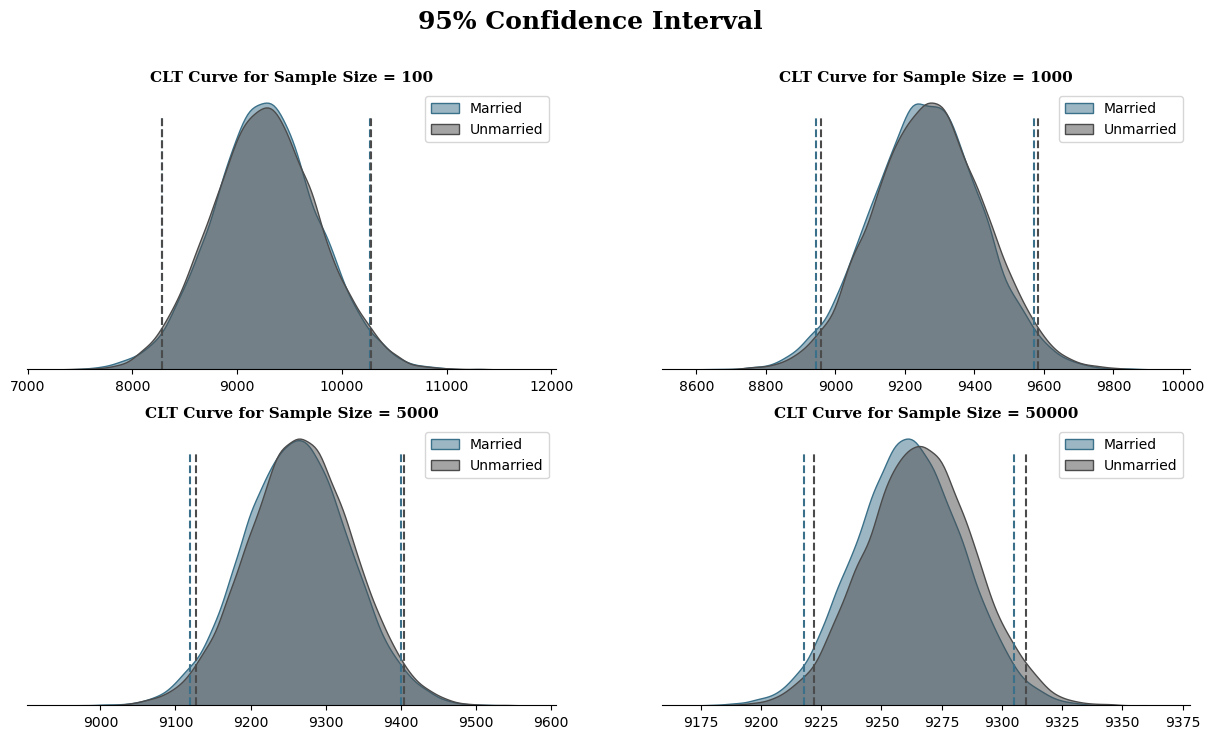

In [36]:
m_samp_95,u_samp_95 = plot(95)

# Are confidence intervals of average married and unmarried customer spending overlapping?

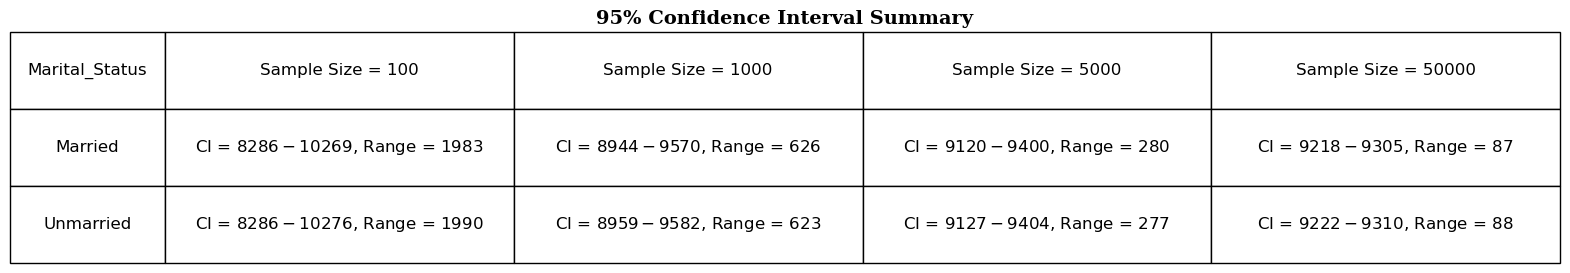

In [37]:
#setting the plot style
fig,ax = plt.subplots(figsize = (20,3))

#list for collecting ci for given cl
m_ci = ['Married'] 
u_ci = ['Unmarried'] 

#finding ci for each sample size (married)
for m in m_samp_95:  
    m_range = confidence_interval(m_samp_95[m],95)
    m_ci.append(f"CI = ${m_range[0]:.0f} - ${m_range[1]:.0f}, Range = {(m_range[1] - m_range[0]):.0f}")

#finding ci for each sample size (unmarried)
for u in u_samp_95:  
    u_range = confidence_interval(u_samp_95[u],95)
    u_ci.append(f"CI = ${u_range[0]:.0f} - ${u_range[1]:.0f}, Range = {(u_range[1] - u_range[0]):.0f}")

                                    #plotting the summary
#contents of the table
ci_info = [m_ci,u_ci]

#plotting the table
table = ax.table(cellText = ci_info, cellLoc='center',
             colLabels =['Marital_Status','Sample Size = 100','Sample Size = 1000','Sample Size = 5000','Sample Size = 50000'],
             colLoc = 'center',colWidths = [0.1,0.225,0.225,0.225,0.225],bbox =[0, 0, 1, 1])

table.set_fontsize(13)

#removing axis 
ax.axis('off')

#setting title
ax.set_title(f"95% Confidence Interval Summary",{'font':'serif', 'size':14,'weight':'bold'})

plt.show()

#### Insights
* Sample Size

* The analysis highlights the importance of sample size in estimating population parameters. It suggests that as the sample size increases, the confidence intervals become narrower and more precise. In business, this implies that larger sample sizes can provide more reliable insights and estimates.

* Confidence Intervals

* From the above analysis, we can see that the confidence interval overlap for all the sample sizes. This means that there is no statistically significant difference between the average spending per transaction for married and unmarried customers within the given samples.

* Population Average

* We are 95% confident that the true population average for married customers falls between 9,217 and 9,305, and for unmarried customers, it falls between 9,222 and 9,311.

* Both the customers spend equal

* The overlapping confidence intervals of average spending for married and unmarried customers indicate that both married and unmarried customers spend a similar amount per transaction. This implies a resemblance in spending behavior between the two groups.

###### How can Walmart leverage this conclusion to make changes or improvements?
### Marketing Resources

* Walmart may not need to allocate marketing resources specifically targeting one group over the other. Instead, they can focus on broader marketing strategies that appeal to both groups.

# Customer Age VS Purchase Amount
* Data Visualization

In [38]:
#creating a df for purchase amount vs age group
temp = df.groupby('Age')['Purchase'].agg(['sum','count']).reset_index()

#calculating the amount in billions
temp['sum_in_billions'] = round(temp['sum'] / 10**9,2)

#calculationg percentage distribution of purchase amount
temp['%sum'] = round(temp['sum']/temp['sum'].sum(),3)

#calculationg per purchase amount
temp['per_purchase'] = round(temp['sum']/temp['count'])

temp

,Age,sum,count,sum_in_billions,%sum,per_purchase
0,0-17,134913183,15102,0.13,0.026,8933.0
1,18-25,913848675,99660,0.91,0.179,9170.0
2,26-35,2031770578,219587,2.03,0.399,9253.0
3,36-45,1026569884,110013,1.03,0.201,9331.0
4,46-50,420843403,45701,0.42,0.083,9209.0
5,51-55,367099644,38501,0.37,0.072,9535.0
6,55+,200767375,21504,0.20,0.039,9336.0


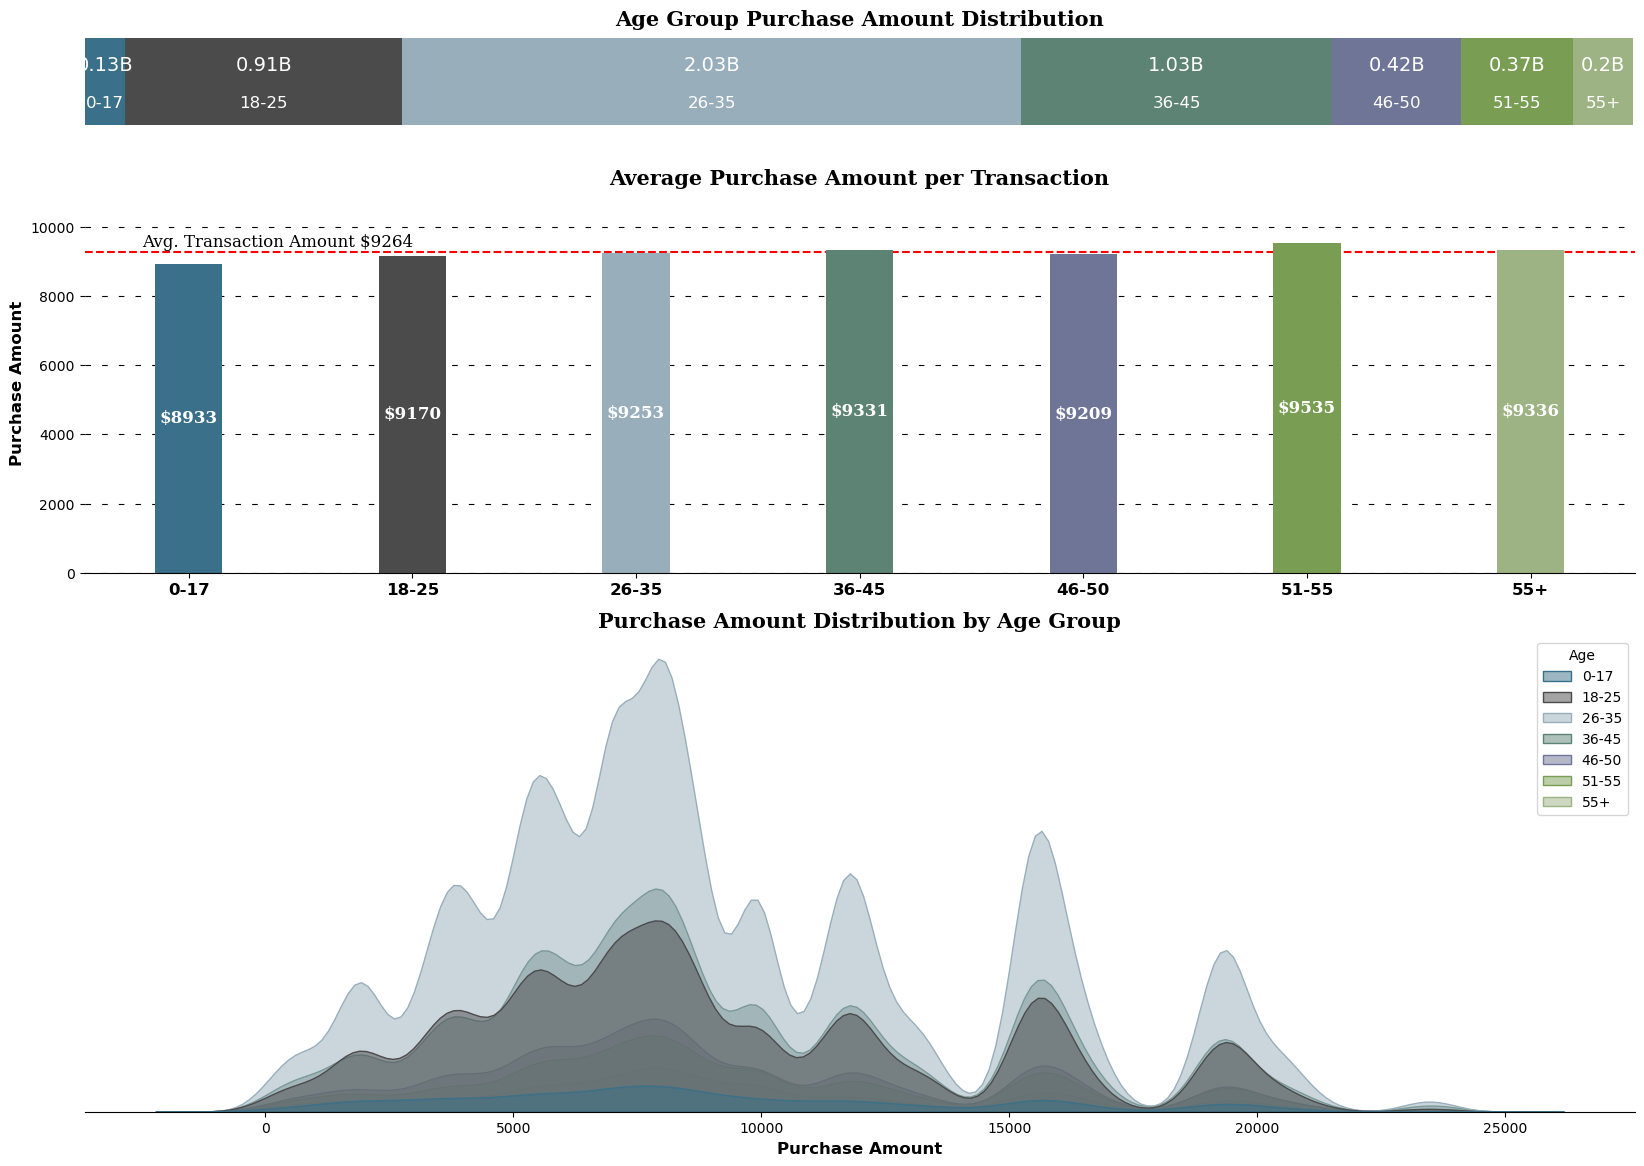

In [39]:
#setting the plot style
fig = plt.figure(figsize = (20,14))
gs = fig.add_gridspec(3,1,height_ratios =[0.10,0.4,0.5])


                                        #Distribution of Purchase Amount
ax = fig.add_subplot(gs[0])
color_map = ["#3A7089", "#4b4b4c",'#99AEBB','#5C8374','#6F7597','#7A9D54','#9EB384']

#plotting the visual
left = 0

for i in temp.index:
    ax.barh(temp.loc[0,'Age'],width = temp.loc[i,'%sum'],left = left,color = color_map[i],label = temp.loc[i,'Age'])
    left += temp.loc[i,'%sum']

#inserting the text
txt = 0.0 #for left parameter in ax.text()

for i in temp.index:
    #for amount
    ax.text(temp.loc[i,'%sum']/2 + txt,0.15,f"{temp.loc[i,'sum_in_billions']}B",
           va = 'center', ha='center',fontsize=14, color='white')
    
    #for age grp
    ax.text(temp.loc[i,'%sum']/2 + txt,- 0.20 ,f"{temp.loc[i,'Age']}",
           va = 'center', ha='center',fontsize=12, color='white')    
    
    txt += temp.loc[i,'%sum']
    
#removing the axis lines
for s in ['top','left','right','bottom']:
    ax.spines[s].set_visible(False)
    
#customizing ticks
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlim(0,1)

#plot title
ax.set_title('Age Group Purchase Amount Distribution',{'font':'serif', 'size':15,'weight':'bold'})


                                            #Distribution of Purchase Amount per Transaction
    
ax1 = fig.add_subplot(gs[1])


#plotting the visual
ax1.bar(temp['Age'],temp['per_purchase'],color = color_map,zorder = 2,width = 0.3)

#adding average transaction line
avg = round(df['Purchase'].mean())

ax1.axhline(y = avg, color ='red', zorder = 0,linestyle = '--')

#adding text for the line
ax1.text(0.4,avg + 300, f"Avg. Transaction Amount ${avg:.0f}",
         {'font':'serif','size' : 12},ha = 'center',va = 'center')

#adjusting the ylimits
ax1.set_ylim(0,11000)

#adding the value_counts
for i in temp.index:
    ax1.text(temp.loc[i,'Age'],temp.loc[i,'per_purchase']/2,f"${temp.loc[i,'per_purchase']:.0f}",
             {'font':'serif','size' : 12,'color':'white','weight':'bold' },ha = 'center',va = 'center')
    
#adding grid lines
ax1.grid(color = 'black',linestyle = '--', axis = 'y', zorder = 0, dashes = (5,10))

#removing the axis lines
for s in ['top','left','right']:
    ax1.spines[s].set_visible(False)
    
#adding axis label
ax1.set_ylabel('Purchase Amount',fontweight = 'bold',fontsize = 12)
ax1.set_xticklabels(temp['Age'],fontweight = 'bold',fontsize = 12)

#setting title for visual
ax1.set_title('Average Purchase Amount per Transaction',{'font':'serif', 'size':15,'weight':'bold'})


                                        # creating kdeplot for purchase amount distribution

ax3 = fig.add_subplot(gs[2,:])

#plotting the kdeplot
sns.kdeplot(data = df, x = 'Purchase', hue = 'Age', palette = color_map,fill = True, alpha = 0.5,
            ax = ax3)

#removing the axis lines
for s in ['top','left','right']:
    ax3.spines[s].set_visible(False)
    
# adjusting axis labels
ax3.set_yticks([])
ax3.set_ylabel('')
ax3.set_xlabel('Purchase Amount',fontweight = 'bold',fontsize = 12)

#setting title for visual
ax3.set_title('Purchase Amount Distribution by Age Group',{'font':'serif', 'size':15,'weight':'bold'})

plt.show()

#### Insights
* Total Sales Comparison

* Age group between 26 - 45 accounts to almost 60% of the total sales suggesting that Walmart's Black Friday sales are most popular among these age groups.

* The age group 0-17 has the lowest sales percentage (2.6%), which is expected as they may not have as much purchasing power. Understanding their preferences and providing special offers could be beneficial, especially considering the potential for building customer loyalty as they age.

* Average Transaction Value

* While there is not a significant difference in per purchase spending among the age groups, the 51-55 age group has a relatively low sales percentage (7.2%)but they have the highest per purchase spending at 9535. Walmart could consider strategies to attract and retain this high-spending demographic.

* Distribution of Purchase Amount


* As seen above, the purchase amount for all age groups is not normally distributed.

# Confidence Interval Construction: 
### Estimating Average Purchase Amount per Transaction
* Step 1 - Building CLT Curve

* As seen above, the purchase amount distribution is not Normal. So we need to use Central Limit Theorem. It states the distribution of sample means will approximate a normal distribution, regardless of the underlying population distribution

* Step 2 - Building Confidence Interval

* After building CLT curve, we will create a confidence interval predicting population mean at 95% Confidence level.
* Note - We will use different sample sizes of [100,1000,5000,50000]

In [40]:
#defining a function for plotting the visual for given confidence interval

def plot(ci):

    #setting the plot style
    fig = plt.figure(figsize = (15,15))
    gs = fig.add_gridspec(4,1)

    #creating separate data frames 
    
    df_1 = df.loc[df['Age'] == '0-17','Purchase']
    df_2 = df.loc[df['Age'] == '18-25','Purchase']
    df_3 = df.loc[df['Age'] == '26-35','Purchase']
    df_4 = df.loc[df['Age'] == '36-45','Purchase']
    df_5 = df.loc[df['Age'] == '46-50','Purchase']
    df_6 = df.loc[df['Age'] == '51-55','Purchase']
    df_7 = df.loc[df['Age'] == '55+','Purchase']
    

    #sample sizes and corresponding plot positions
    sample_sizes = [(100,0),(1000,1),(5000,2),(50000,3)]

    #number of samples to be taken from purchase amount
    bootstrap_samples = 20000

    samples1,samples2,samples3,samples4,samples5,samples6,samples7 = {},{},{},{},{},{},{}
    
    for i,x in sample_sizes:
        l1,l2,l3,l4,l5,l6,l7 = [],[],[],[],[],[],[]

        for j in range(bootstrap_samples):

            #creating random 5000 samples of i sample size
            bootstrapped_samples_1 = np.random.choice(df_1,size = i)
            bootstrapped_samples_2 = np.random.choice(df_2,size = i)
            bootstrapped_samples_3 = np.random.choice(df_3,size = i)
            bootstrapped_samples_4 = np.random.choice(df_4,size = i)
            bootstrapped_samples_5 = np.random.choice(df_5,size = i)
            bootstrapped_samples_6 = np.random.choice(df_6,size = i)
            bootstrapped_samples_7 = np.random.choice(df_7,size = i)

            #calculating mean of those samples
            sample_mean_1 = np.mean(bootstrapped_samples_1)
            sample_mean_2 = np.mean(bootstrapped_samples_2)
            sample_mean_3 = np.mean(bootstrapped_samples_3)
            sample_mean_4 = np.mean(bootstrapped_samples_4)
            sample_mean_5 = np.mean(bootstrapped_samples_5)
            sample_mean_6 = np.mean(bootstrapped_samples_6)
            sample_mean_7 = np.mean(bootstrapped_samples_7)
            
            #appending the mean to the list
            l1.append(sample_mean_1)
            l2.append(sample_mean_2)
            l3.append(sample_mean_3)
            l4.append(sample_mean_4)
            l5.append(sample_mean_5)
            l6.append(sample_mean_6)
            l7.append(sample_mean_7)

        #storing the above sample generated
        samples1[f'{ci}%_{i}'] = l1
        samples2[f'{ci}%_{i}'] = l2
        samples3[f'{ci}%_{i}'] = l3
        samples4[f'{ci}%_{i}'] = l4
        samples5[f'{ci}%_{i}'] = l5
        samples6[f'{ci}%_{i}'] = l6
        samples7[f'{ci}%_{i}'] = l7

        
        #creating a temporary dataframe for creating kdeplot
        temp_df = pd.DataFrame(data = {'0-17':l1,'18-25':l2,'26-35':l3,'36-45':l4,'46-50':l5,'51-55':l6,'55+':l7})

                                                        #plotting kdeplots
        #plot position
        ax = fig.add_subplot(gs[x])
        
        #plots
        for p,q in [('#3A7089', '0-17'),('#4b4b4c', '18-25'),('#99AEBB', '26-35'),('#5C8374', '36-45'),('#6F7597', '46-50'),
                 ('#7A9D54', '51-55'),('#9EB384', '55+')]:
            
            sns.kdeplot(data = temp_df,x = q,color =p ,fill = True, alpha = 0.5,ax = ax,label = q)


        #removing the axis lines
        for s in ['top','left','right']:
            ax.spines[s].set_visible(False)

        # adjusting axis labels
        ax.set_yticks([])
        ax.set_ylabel('')
        ax.set_xlabel('')

        #setting title for visual
        ax.set_title(f'CLT Curve for Sample Size = {i}',{'font':'serif', 'size':11,'weight':'bold'})

        plt.legend()
    
    #setting title for visual
    fig.suptitle(f'{ci}% Confidence Interval',font = 'serif', size = 18, weight = 'bold')

    plt.show()
    
    return samples1,samples2,samples3,samples4,samples5,samples6,samples7

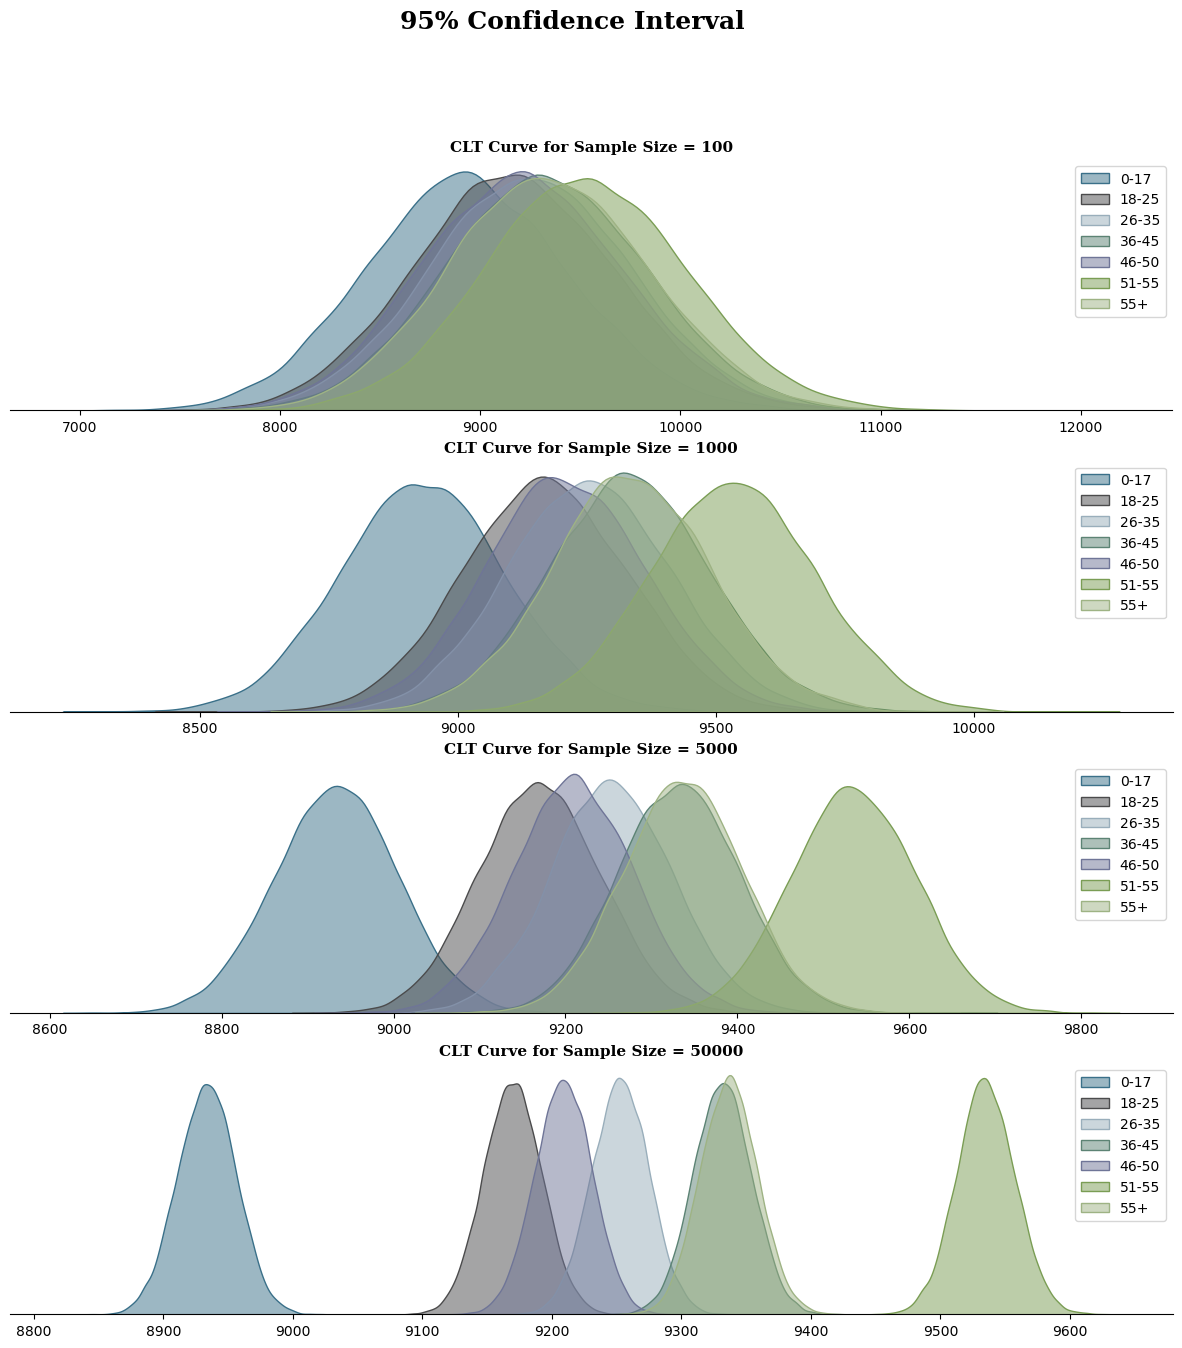

In [41]:
samples1,samples2,samples3,samples4,samples5,samples6,samples7 = plot(95)

# Are confidence intervals of customer's age-group spending overlapping?

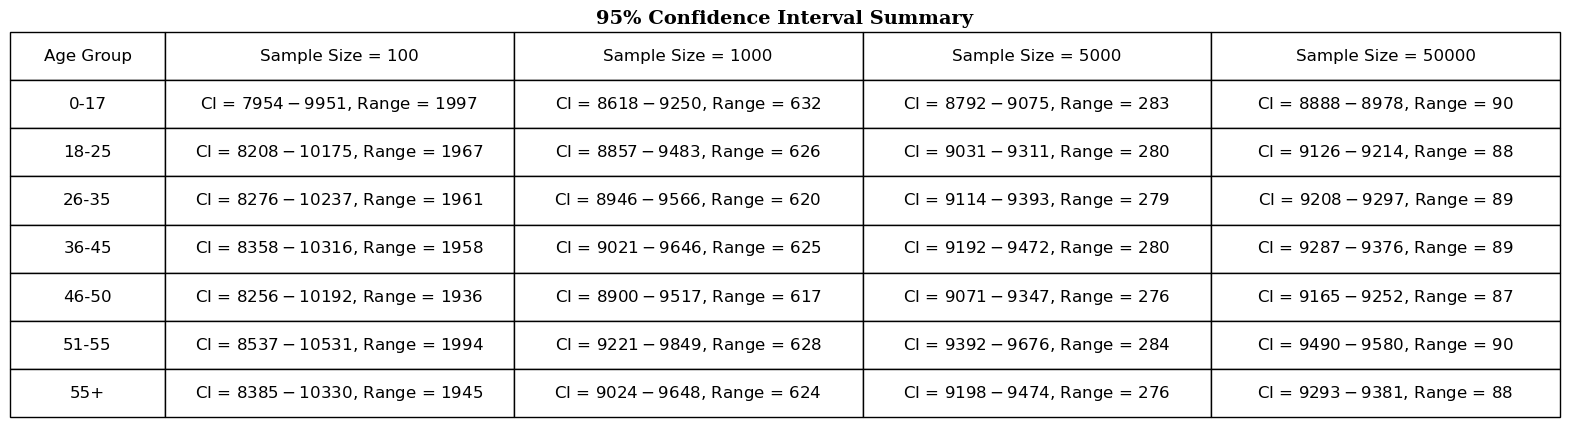

In [42]:
#setting the plot style
fig,ax = plt.subplots(figsize = (20,5))

#list for collecting ci for given cl
ci_1,ci_2,ci_3,ci_4,ci_5,ci_6,ci_7 = ['0-17'],['18-25'],['26-35'],['36-45'],['46-50'],['51-55'],['55+']

#finding ci for each sample size 
#samples = [samples1,samples2,samples3,samples4,samples5,samples6,samples7]

samples = [(samples1,ci_1),(samples2,ci_2),(samples3,ci_3),(samples4,ci_4),(samples5,ci_5),(samples6,ci_6),(samples7,ci_7)]

for s,c in samples:
    for i in s:
        s_range = confidence_interval(s[i],95)
        c.append(f"CI = ${s_range[0]:.0f} - ${s_range[1]:.0f}, Range = {(s_range[1] - s_range[0]):.0f}")


                                    #plotting the summary
#contents of the table
ci_info = [ci_1,ci_2,ci_3,ci_4,ci_5,ci_6,ci_7]

#plotting the table
table = ax.table(cellText = ci_info, cellLoc='center',
             colLabels =['Age Group','Sample Size = 100','Sample Size = 1000','Sample Size = 5000','Sample Size = 50000'],
             colLoc = 'center',colWidths = [0.1,0.225,0.225,0.225,0.225],bbox =[0, 0, 1, 1])

table.set_fontsize(13)

#removing axis 
ax.axis('off')

#setting title
ax.set_title(f"95% Confidence Interval Summary",{'font':'serif', 'size':14,'weight':'bold'})

plt.show()

### Insights

* Sample Size

* The analysis highlights the importance of sample size in estimating population parameters. It suggests that as the sample size increases, the confidence intervals become narrower and more precise. In business, this implies that larger sample sizes can provide more reliable insights and estimates.

* Confidence Intervals and customer spending patterns

* From the above analysis, we can see that the confidence interval overlap for some of the age groups. We can club the average spending into following age groups 0 - 17 - Customers in this age group have the lowest spending per transaction 18 - 25, 26 - 35, 46 - 50 - Customers in these age groups have overlapping confidence intervals indicating similar buying characteristics 36 - 45, 55+ - Customers in these age groups have overlapping confidence intervals indicating and similar spending patterns 51 - 55 - Customers in this age group have the highest spending per transaction

* Population Average

* We are 95% confident that the true population average for following age groups falls between the below range -

 * 0 - 17 = 8,888 to 8,979
 * 18 - 25 = 9,125 to 9,213
 * 26 - 35 = 9,209 to 9,297
 * 36 - 45 = 9,288 to 9,376
 * 46 - 50 = 9,165 to 9,253
 * 51 - 55 = 9,490 to 9,579
 * 55+ = 9,292 to 9,381
 
# How can Walmart leverage this conclusion to make changes or improvements?

* Targeted Marketing

* Knowing that customers in the 0 - 17 age group have the lowest spending per transaction, Walmart can try to increase their spending per transaction by offering them more attractive discounts, coupons, or rewards programs. Walmart can also tailor their product selection and marketing strategies to appeal to the preferences and needs of this age group

* Customer Segmentation

* Since customers in the 18 - 25, 26 - 35, and 46 - 50 age groups exhibit similar buying characteristics, and so do the customers in 36 - 45 and 55+, Walmart can optimize its product selection to cater to the preferences of these age groups. Also, Walmart can use this information to adjust their pricing strategies for different age groups.

* Premium Services

* Recognizing that customers in the 51 - 55 age group have the highest spending per transaction, Walmart can explore opportunities to enhance the shopping experience for this demographic. This might involve offering premium services, personalized recommendations, or loyalty programs that cater to the preferences and spending habits of this age group.

# Recommendations

* 1.Target Male Shoppers

* Since male customers account for a significant portion of Black Friday sales and tend to spend more per transaction on average, Walmart should tailor its marketing strategies and product offerings to incentivize higher spending among male customers while ensuring competitive pricing for female-oriented products.

* 2. Focus on 26 - 45 Age Group

* With the age group between 26 and 45 contributing to the majority of sales, Walmart should specifically cater to the preferences and needs of this demographic.This could include offering exclusive deals on products that are popular among this age group.

* 3. Engage Younger Shoppers

* Knowing that customers in the 0 - 17 age group have the lowest spending per transaction, Walmart can try to increase their spending per transaction by offering them more attractive discounts, coupons, or rewards programs. It's essential to start building brand loyalty among younger consumers.

* 4. Customer Segmentation

* Since customers in the 18 - 25, 26 - 35, and 46 - 50 age groups exhibit similar buying characteristics, and so do the customers in 36 - 45 and 55+, Walmart can optimize its product selection to cater to the preferences of these age groups. Also, Walmart can use this information to adjust their pricing strategies for different age groups.

* 5. Enhance the 51 - 55 Age Group Shopping Experience

*  Considering that customers aged 51 - 55 have the highest spending per transaction, Walmart offer them exclusive pre-sale access, special discount or provide personalized product recommendations for this age group. Walmart can also introduce loyalty programs specifically designed to reward and retain customers in the 51 - 55 age group.

* 6. Post-Black Friday Engagement

* After Black Friday, walmart should engage with customers who made purchases by sending follow-up emails or offers for related products. This can help increase customer retention and encourage repeat business throughout the holiday season and beyond.